# Importing Libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

# Loading Dataset

In [2]:
# Loading dataset
data =  pd.read_csv("hiring_assignment_cv.csv")

# making copy of original data, we will perform our operations on the copy
df = data.copy()
df.shape

(25356, 69)

In [3]:
df.head(5)

,uuid,y,v1,v2,v3,v4,v5,v6,v7,v8,...,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67
0,1001,0,3,1.0,0.072289,0.000000,0,5,1,2.250000,...,2.119686,0.416667,0.520833,0.428571,0.227273,0.837209,1.000000,0.757009,0.757009,3.0
1,1002,0,1,1.0,0.052632,0.000000,1,5,0,1.666667,...,2.049976,0.166667,0.500000,0.000000,0.428571,0.500000,1.000000,0.352941,0.352941,1.0
2,1003,0,1,2.0,0.138158,0.055556,2,5,0,3.750000,...,4.163819,0.298246,0.631579,0.055556,0.000000,0.333333,0.400000,0.196262,0.196262,7.0
3,1004,0,0,0.0,0.082474,0.018868,0,2,0,0.250000,...,0.792426,0.272727,0.613636,0.083333,0.034483,0.756757,0.972973,0.673077,0.673077,7.0
4,1005,0,1,1.5,0.000000,0.051282,1,3,1,1.750000,...,1.074042,0.152174,0.760870,0.000000,0.000000,0.700000,0.875000,0.654206,0.654206,8.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25356 entries, 0 to 25355
Data columns (total 69 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uuid    25356 non-null  int64  
 1   y       25356 non-null  int64  
 2   v1      25356 non-null  int64  
 3   v2      25356 non-null  float64
 4   v3      25356 non-null  float64
 5   v4      25356 non-null  float64
 6   v5      25356 non-null  int64  
 7   v6      25356 non-null  int64  
 8   v7      25356 non-null  int64  
 9   v8      25356 non-null  float64
 10  v9      25356 non-null  float64
 11  v10     25356 non-null  float64
 12  v11     25356 non-null  float64
 13  v12     25356 non-null  float64
 14  v13     25356 non-null  int64  
 15  v14     25356 non-null  float64
 16  v15     25356 non-null  float64
 17  v16     25356 non-null  float64
 18  v17     25356 non-null  float64
 19  v18     25356 non-null  float64
 20  v19     25356 non-null  float64
 21  v20     25356 non-null  float64
 22

### Observations
- uuid is id column and can be drop
- dtypes of columns are either int64, float64 (need to explore more to see the ordinal behavior of features)
- primarily it looks like there are no null values

# Data Pre-Processing

In [5]:
# dropping uuid column
df.drop(['uuid'],axis=1,inplace=True)

In [6]:
# finding duplicates
df.duplicated().sum()

0

In [7]:
# function to check missing value
def check_missing_value(data,col):
    ''' function will take dataframe and column name as input
     and will print missing values corresponding to each column '''
    print(col,df[col].isnull().sum())

In [8]:
# printing count of missing values corresponding to each column
for col in df.columns:
    check_missing_value(df,col)

y 0
v1 0
v2 0
v3 0
v4 0
v5 0
v6 0
v7 0
v8 0
v9 0
v10 0
v11 0
v12 0
v13 0
v14 0
v15 0
v16 0
v17 0
v18 0
v19 0
v20 0
v21 0
v22 0
v23 0
v24 0
v25 0
v26 0
v27 0
v28 0
v29 0
v30 0
v31 0
v32 0
v33 0
v34 0
v35 0
v36 0
v37 0
v38 0
v39 0
v40 0
v41 0
v42 0
v43 0
v44 0
v45 0
v46 0
v47 0
v48 0
v49 0
v50 0
v51 0
v52 0
v53 0
v54 0
v55 0
v56 0
v57 0
v58 0
v59 0
v60 0
v61 0
v62 0
v63 0
v64 0
v65 0
v66 0
v67 0


In [9]:
# fucntion to check number of unique value present in each column
def unique_value(data,col):
    ''' function will take dataframe and column name as input
     and will print unique values corresponding to each column '''
    
    print(col,data[col].nunique())

In [10]:
# printing number of unique values corresponding to each column
for col in df.columns:
    unique_value(df,col)

y 2
v1 7
v2 97
v3 1179
v4 1094
v5 3
v6 6
v7 5
v8 111
v9 25
v10 15
v11 1200
v12 405
v13 2
v14 213
v15 238
v16 4737
v17 20588
v18 19194
v19 7138
v20 2374
v21 5404
v22 8931
v23 3789
v24 319
v25 7389
v26 20674
v27 1110
v28 1213
v29 7049
v30 21669
v31 2365
v32 71
v33 237
v34 116
v35 10
v36 2528
v37 1090
v38 10
v39 53
v40 247
v41 48
v42 2568
v43 1
v44 1
v45 1
v46 1
v47 1
v48 1
v49 9
v50 19844
v51 22514
v52 21273
v53 21235
v54 21268
v55 21020
v56 21401
v57 21347
v58 21488
v59 1249
v60 1377
v61 317
v62 632
v63 1293
v64 1266
v65 3733
v66 3733
v67 10


#### Observations
- There are no duplicate values
- There are no missing values

### Splitting Dataset into two datframes (Dependent and Independent Variable)

In [11]:
# Splitting the data frame based on dependent and independent variable
# in our case 'y' is our target column
X_raw = df.drop(['y'],axis=1)
y= df[['y']]

In [12]:
X_raw.shape

(25356, 67)

In [13]:
# Peeking into the data of first 20 columns
X_raw[X_raw.columns[0:20]].head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20
0,3,1.0,0.072289,0.000000,0,5,1,2.250000,0.750000,0.500000,0.072289,0.000000,1,9.000000,3.166667,0.696970,-2473.422577,0.011237,0.605405,0.526316
1,1,1.0,0.052632,0.000000,1,5,0,1.666667,0.666667,0.666667,0.052632,0.000000,1,5.000000,3.609587,0.234694,-511.942258,0.034617,0.495902,0.288462
2,1,2.0,0.138158,0.055556,2,5,0,3.750000,2.500000,1.000000,0.140000,0.053333,1,34.333333,5.833333,0.279412,-100909.290100,0.000810,0.505814,0.500000
3,0,0.0,0.082474,0.018868,0,2,0,0.250000,0.250000,0.000000,0.082474,0.000000,0,39.333333,6.000000,0.380952,5522.287579,0.000000,0.604167,0.454545
4,1,1.5,0.000000,0.051282,1,3,1,1.750000,0.250000,0.250000,0.000000,0.000000,1,34.666667,4.000000,0.356604,-49590.867140,0.000317,0.680504,0.258985


In [14]:
# Peeking into the data of next 20 columns
X_raw[X_raw.columns[20:40]].head()

,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40
0,16.578947,0.231746,0.785047,8569.00000,5.875000,2.189692,18.250000,1.000000,0.651786,2424.36,0.048000,4.666667,12.000000,5.333333,7.000000,0.273973,0.409091,-2.0,24.00000,9.800000
1,25.600000,0.480469,0.352941,16790.00000,7.018160,2.049976,41.000000,1.000000,1.016529,490.67,0.092000,0.000000,6.000000,2.000000,7.000000,0.308943,0.218182,-4.0,27.00000,21.200000
2,2.943396,0.769670,0.112150,9399.00000,4.161508,2.973970,18.888889,0.277778,0.977011,153959.51,0.110000,10.666667,38.666667,23.333333,8.000000,0.211765,0.262821,4.0,54.00000,25.400000
3,16.714286,0.162393,0.846154,14447.90638,4.291667,0.775067,14.250000,1.000000,0.655172,29798.68,0.062626,6.000000,39.000000,9.666667,6.000000,0.578947,0.280000,1.0,9.00000,9.800000
4,23.580120,0.264931,0.308411,14447.90638,4.818254,5.057200,23.347984,0.850000,0.519292,107199.70,0.038554,7.000000,46.666667,19.666667,4.465064,0.350324,0.200000,-2.0,28.35022,10.186421


In [15]:
# Peeking into the data of first remaining columns
X_raw[X_raw.columns[40:]].head()

,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,...,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67
0,24.00000,0.273973,0,0,0,0,0,0,0.714286,0.155855,...,2.119686,0.416667,0.520833,0.428571,0.227273,0.837209,1.000000,0.757009,0.757009,3.0
1,46.00000,0.308943,0,0,0,0,0,0,0.714286,0.266844,...,2.049976,0.166667,0.500000,0.000000,0.428571,0.500000,1.000000,0.352941,0.352941,1.0
2,46.00000,0.211765,0,0,0,0,0,0,0.714286,0.313234,...,4.163819,0.298246,0.631579,0.055556,0.000000,0.333333,0.400000,0.196262,0.196262,7.0
3,31.00000,0.621622,0,0,0,0,0,0,0.714286,0.143281,...,0.792426,0.272727,0.613636,0.083333,0.034483,0.756757,0.972973,0.673077,0.673077,7.0
4,18.22623,0.349309,0,0,0,0,0,0,0.721683,0.137439,...,1.074042,0.152174,0.760870,0.000000,0.000000,0.700000,0.875000,0.654206,0.654206,8.0


In [16]:
y.tail()

,y
25351,0
25352,0
25353,0
25354,1
25355,0


In [17]:
# Checking the event rate
y.mean()

y    0.059079
dtype: float64

In [18]:
# checking the distinct count of values in target column
y.y.value_counts()

0    23858
1     1498
Name: y, dtype: int64

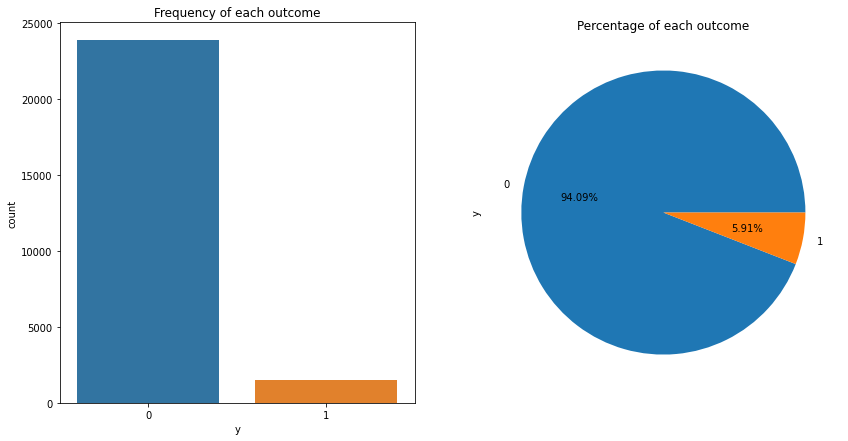

In [19]:
# visualizing target column distribution
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='y',data=y,ax=axs[0])
axs[0].set_title("Frequency of each outcome")
y.y.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each outcome")
plt.show()


- Above plot shows we have more negative outcome than positive.
    - we have made assumption that :
       1 - Positive Outcome 
       0 - Negative outcome
- Since output column has only two categories, we can treat it as a classification problem

In [20]:
# Removing columns that has just one value
X_raw = X_raw.loc[:,X_raw.apply(pd.Series.nunique) != 1]

In [21]:
X_raw.shape

(25356, 61)

In [22]:
# finding columns which has less than 10 unique values
columns_with_lt_10_values = []
for col in X_raw.columns:
    if (len(X_raw[col].unique()) < 10):
        columns_with_lt_10_values.append(col)
#         print(X_raw[col].value_counts())
columns_with_lt_10_values        

['v1', 'v5', 'v6', 'v7', 'v13', 'v49']

In [23]:
# function for visualizing the value_counts for each column 
def show_countplot(data,col):
    '''Fucntion will take and dataframe and column name as input
        O/p - Shows countplot
    
    '''
    
    # define figure size
    plt.figure(figsize=(16, 4))
    
    # countplot
    plt.subplot(1, 3, 1)
    sns.countplot(x= col, data=data, order=df[col].value_counts().index)
    plt.title('Countplot')
    
    plt.show()
   

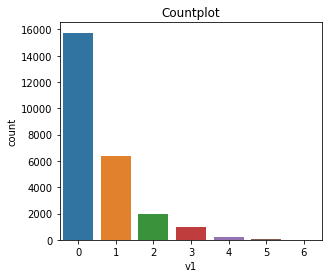

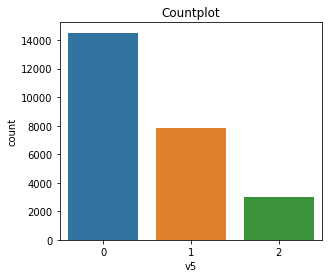

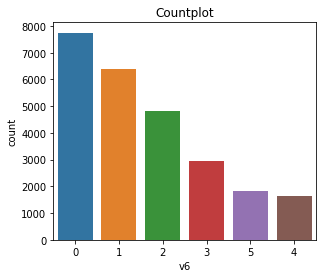

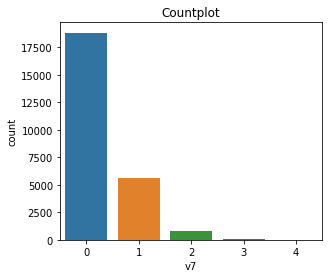

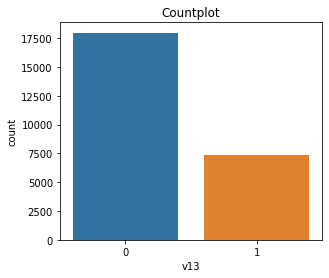

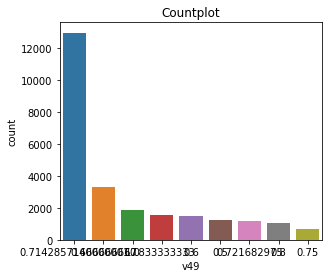

In [24]:
# Plotting countplot for each value in columns_with_lt_10_values
for col in columns_with_lt_10_values:
    show_countplot(X_raw,col)

### Observations
- From above data we can observe that :
    - Columns v1,v5,v6,v7 and v13 are having few distinct values and depicting some category-wise information. Hence these variables can be treated as categorical variables
    - we can't say the same for v49 cause it contains continuous values
    

### Splitting Dependent dataframe into categorical and numerical feature dataframes

In [25]:

# Splitting X_raw into categorical and Numerical features
cat_features = ['v1','v5','v6','v7','v13']
X_num = X_raw.drop(cat_features,axis=1)
X_cat = X_raw[cat_features]

In [26]:
X_num.shape

(25356, 56)

In [27]:
X_cat.shape

(25356, 5)

### Here onwards we will process numerical and categorical features separately
- X_num - Contains all the numerical features
- X_cat - Contains all the categorical features

# Exploratory Data Analysis

In [28]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Checking for number of rows having missing values
X_num.isnull().sum()

v2     0
v3     0
v4     0
v8     0
v9     0
v10    0
v11    0
v12    0
v14    0
v15    0
v16    0
v17    0
v18    0
v19    0
v20    0
v21    0
v22    0
v23    0
v24    0
v25    0
v26    0
v27    0
v28    0
v29    0
v30    0
v31    0
v32    0
v33    0
v34    0
v35    0
v36    0
v37    0
v38    0
v39    0
v40    0
v41    0
v42    0
v49    0
v50    0
v51    0
v52    0
v53    0
v54    0
v55    0
v56    0
v57    0
v58    0
v59    0
v60    0
v61    0
v62    0
v63    0
v64    0
v65    0
v66    0
v67    0
dtype: int64

## Outlier Analysis Numerical Features

In [30]:
num_features = X_num.columns
len(num_features)

56

In [31]:
# describing the numerical features percentile for first 20 numerical columns
X_num[num_features[0:20]].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.9,0.99])

,v2,v3,v4,v8,v9,v10,v11,v12,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25
count,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000
mean,0.668034,0.043543,0.051626,1.251896,0.844074,0.419529,0.045043,0.004375,14.093725,3.431603,0.373634,3819.488870,0.146385,0.683323,0.196634,29.775572,0.263219,0.457789,14292.382671,7.069819
std,1.349966,0.059037,0.089443,1.944430,1.116940,0.659001,0.061307,0.013119,13.323202,2.458283,0.241962,37422.248099,0.357838,0.130463,0.135430,20.214933,0.177888,0.269831,6275.222022,7.218507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-129089.417600,0.000000,0.294421,0.000000,2.000000,0.032176,0.000000,5799.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-129089.417600,0.000000,0.294421,0.000000,2.000000,0.032176,0.000000,5799.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000,-42808.971788,0.000000,0.427020,0.015625,4.896552,0.067065,0.000000,6890.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.100879,-19718.758360,0.000000,0.500000,0.043669,7.658216,0.089744,0.120000,7990.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.333333,2.000000,0.216667,-4915.030326,0.002886,0.611111,0.090909,14.406818,0.137421,0.280374,9999.000000,3.500000
50%,0.000000,0.000000,0.000000,0.500000,0.333333,0.000000,0.000000,0.000000,10.000000,3.000000,0.343750,-231.524048,0.035613,0.696841,0.171429,24.000000,0.218045,0.435185,14447.906380,6.232044
75%,0.750000,0.085959,0.081081,1.750000,1.250000,0.500000,0.087719,0.000000,19.333333,4.000000,0.480769,5852.063284,0.146783,0.780354,0.260870,40.857143,0.327103,0.595798,15999.000000,8.464286


In [32]:
# we will try to visualize outliers with the help of boxplot,histograms,Q-Q plots,


def show_plots(df, variable):
    # function takes a dataframe (df) and variable name   

    # define figure size
    plt.figure(figsize=(16, 4))
    # boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    # histogram
    plt.subplot(1, 3, 2)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')



    plt.show()

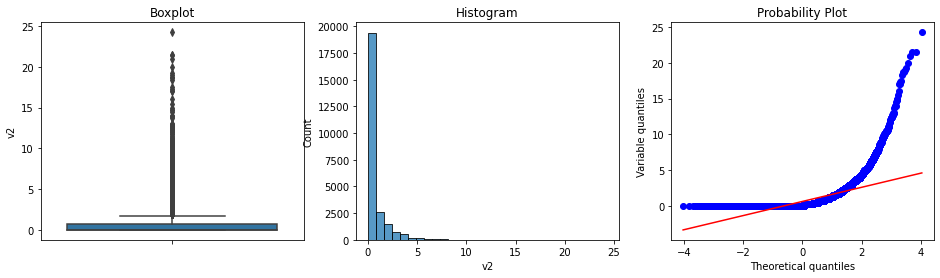

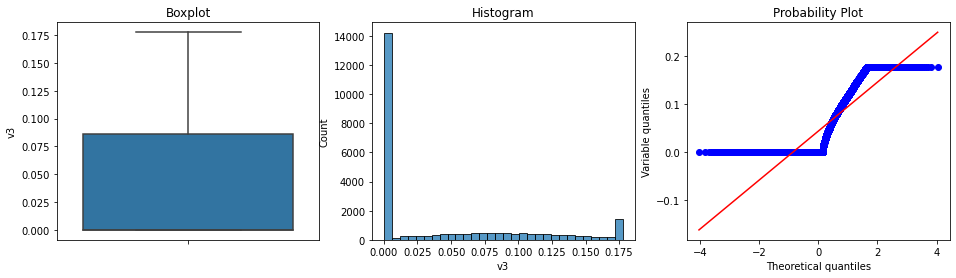

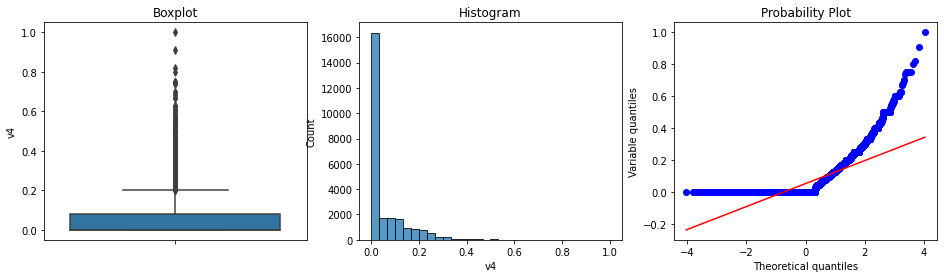

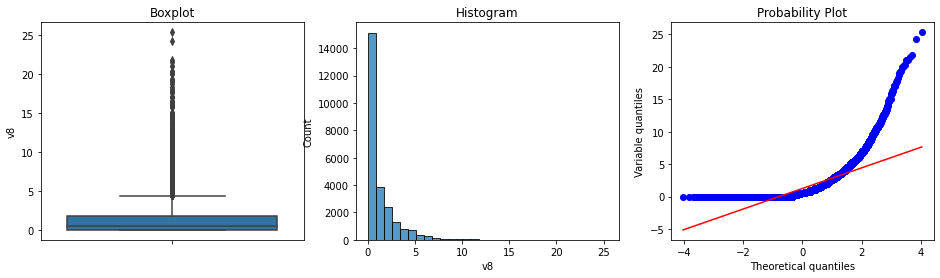

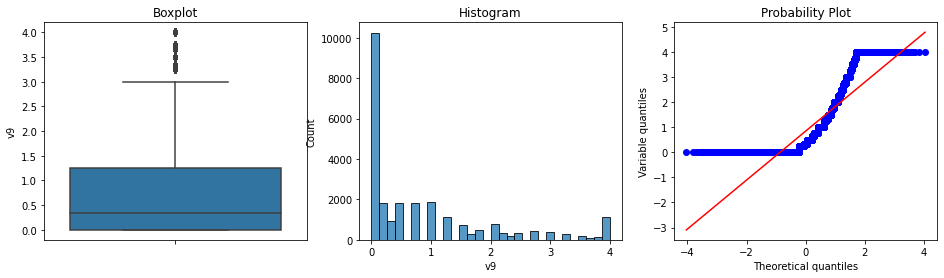

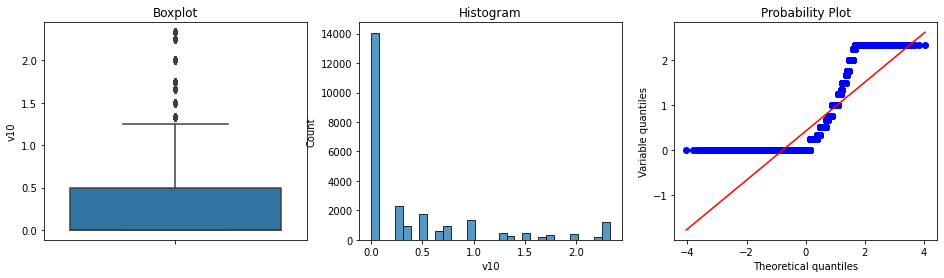

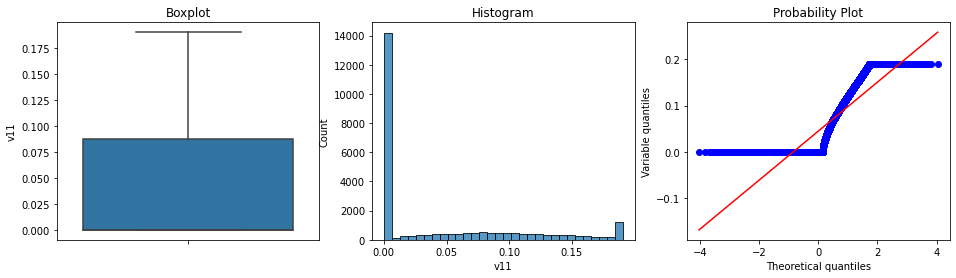

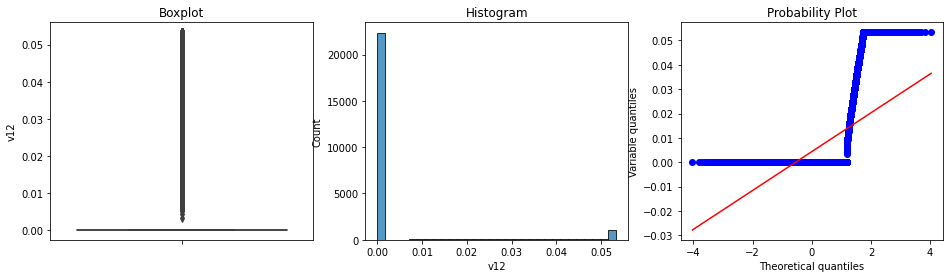

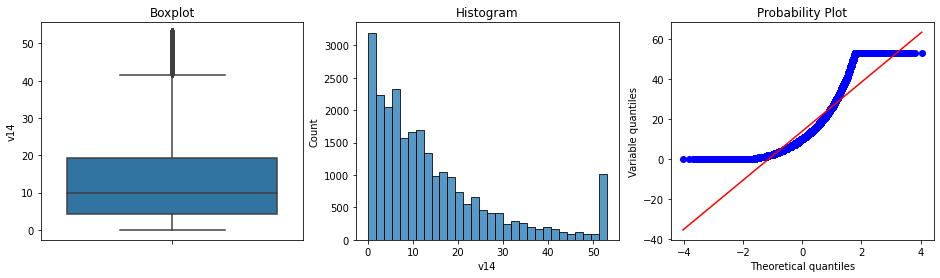

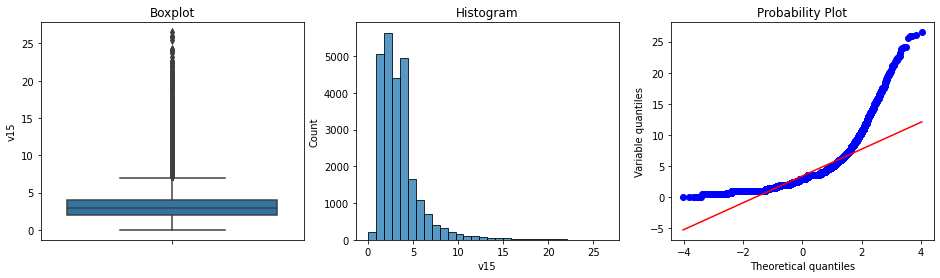

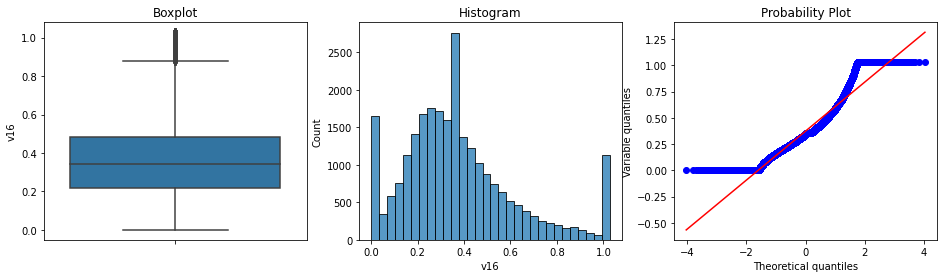

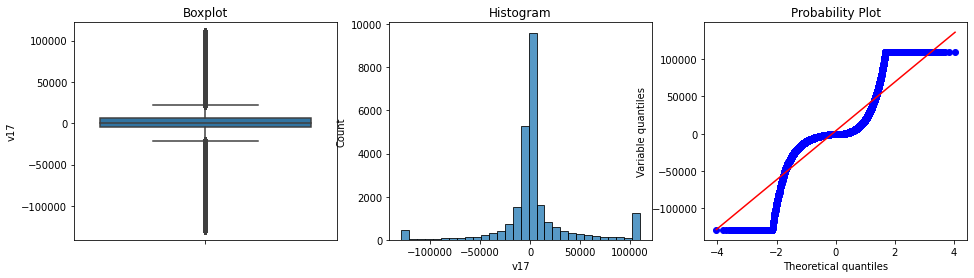

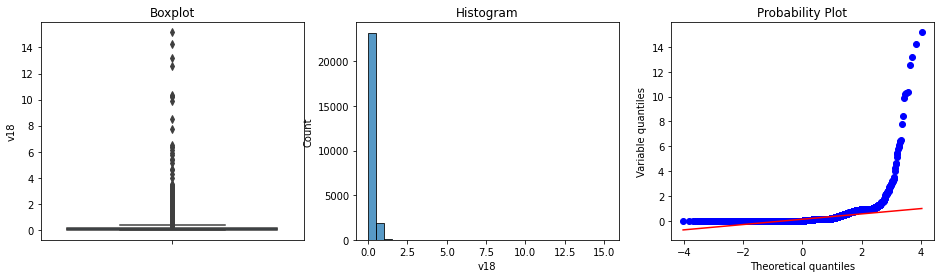

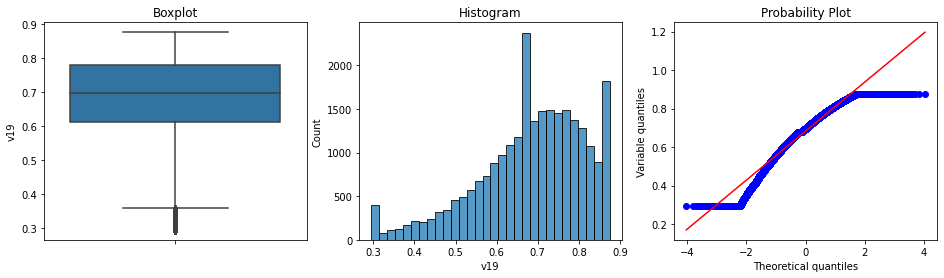

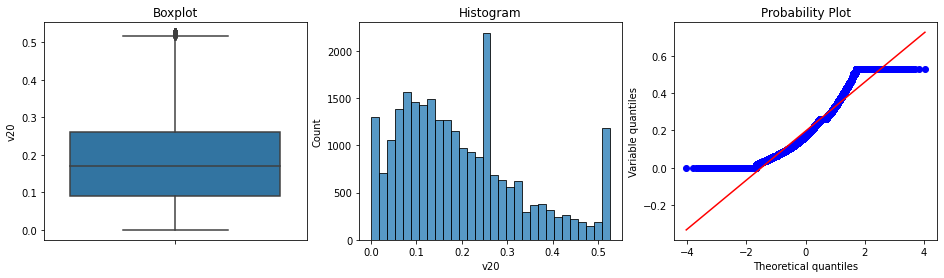

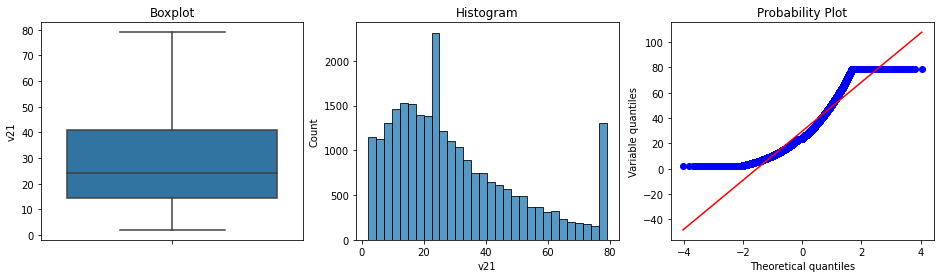

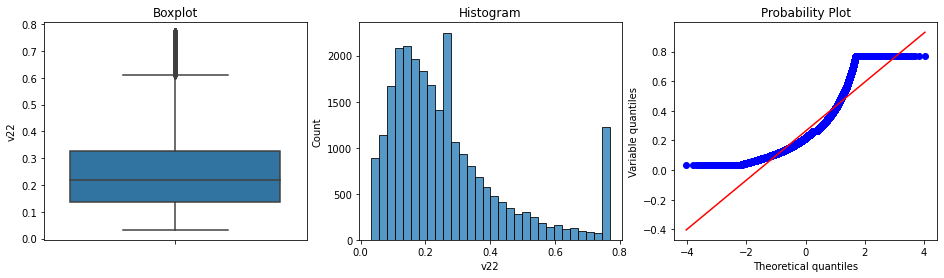

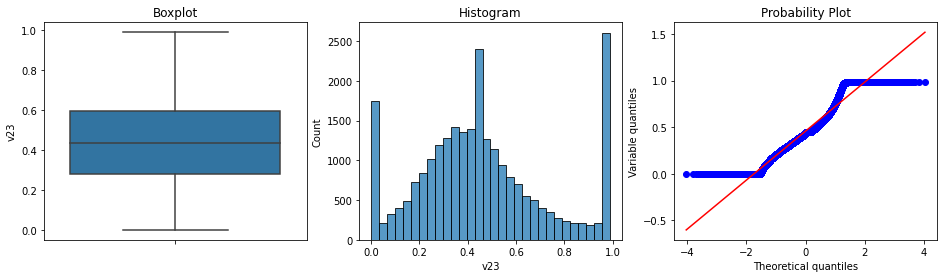

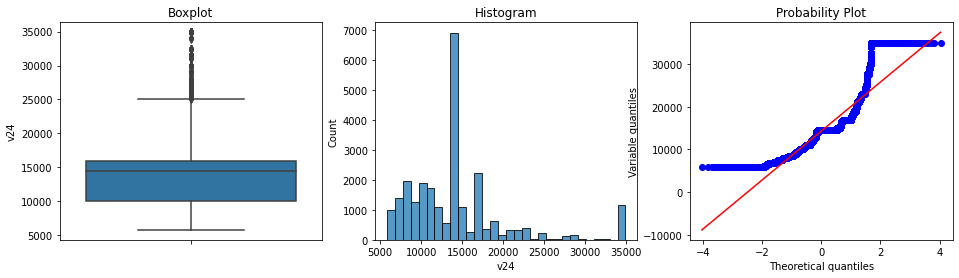

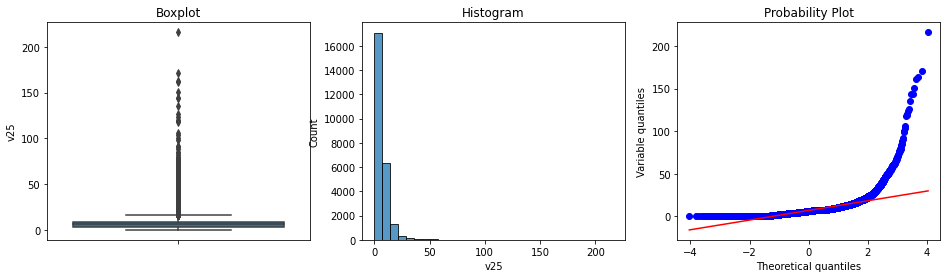

In [33]:
# visualizing for first 20 columns
for cols in X_num.columns[0:20]:
    show_plots(X_num, cols)

#### Columnwise Observations

- Columns v2,v4,v8,v9,v10,v12,v14,v15,v16,v17,v18,v19,v20,v22,v24,v25 have outliers

In [34]:
# making list of columns with outliers
columns_with_outlier_1 = ['v2','v4','v8','v9','v10','v12','v14','v15','v16','v17','v18','v19','v20','v22','v22','v24','v25']

In [35]:
# describing the numerical features percentile for next 20 numerical columns
X_num[num_features[20:40]].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.9,0.99])

,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v49,v50,v51
count,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000
mean,1.592080,26.601066,0.746844,0.516281,46002.866261,0.044093,4.255401,16.616304,7.759643,3.130077,0.269925,0.218759,0.035288,23.240058,10.942345,20.740419,0.271485,0.724256,0.135266,53567.858084
std,1.280585,17.772628,0.265001,0.331770,62434.247991,0.026318,4.473108,15.546298,7.582688,2.510984,0.141292,0.096171,1.749727,13.373622,5.980774,11.958505,0.144468,0.102071,0.071566,75171.368872
min,0.049056,1.000000,0.000000,0.090909,8.662400,0.000000,0.000000,0.333333,0.000000,0.000000,0.016000,0.000000,-4.000000,3.000000,1.000000,0.000000,0.023077,0.500000,0.020108,0.000000
1%,0.049056,1.000000,0.000000,0.090909,8.662400,0.000000,0.000000,0.333333,0.000000,0.000000,0.016000,0.000000,-4.000000,3.000000,1.000000,0.000000,0.023077,0.500000,0.020108,0.000000
5%,0.187981,5.393750,0.153846,0.147541,706.422500,0.010000,0.000000,1.000000,0.000000,0.000000,0.070278,0.062500,-3.000000,6.000000,3.400000,4.000000,0.070278,0.600000,0.041366,934.595000
10%,0.353310,8.000000,0.400000,0.190127,1882.185000,0.014199,0.000000,2.000000,0.333333,0.000000,0.102273,0.090909,-2.000000,8.000000,4.500000,7.000000,0.102273,0.600000,0.055345,2267.065000
25%,0.694809,13.794444,0.611111,0.281470,6298.252500,0.024742,1.000000,5.000000,2.000000,1.000000,0.161765,0.153846,-1.000000,13.000000,6.600000,12.000000,0.161765,0.714286,0.082532,7085.632500
50%,1.324053,23.000000,0.789474,0.435047,21160.905000,0.038554,2.666667,11.666667,5.500000,3.000000,0.250000,0.221509,0.000000,21.000000,10.000000,18.226230,0.250000,0.714286,0.123787,22895.695000
75%,1.851202,34.666667,1.000000,0.636033,48913.045000,0.058000,5.666667,23.000000,10.666667,5.000000,0.350324,0.281250,1.000000,30.000000,14.000000,28.000000,0.349309,0.721683,0.172000,56867.375000


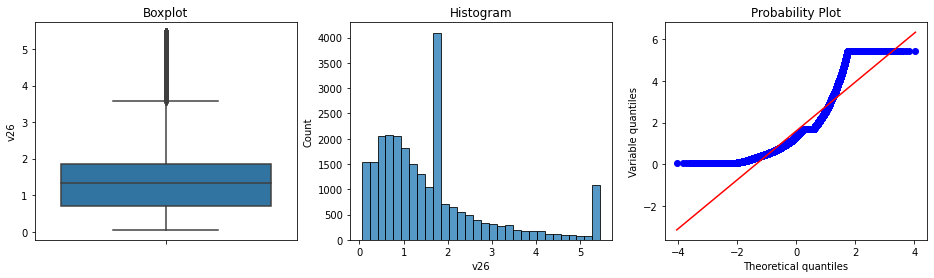

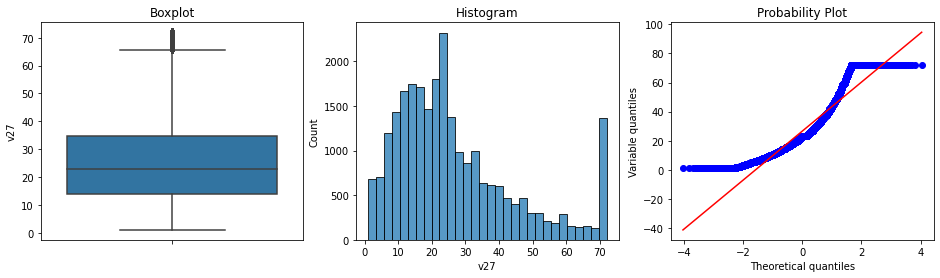

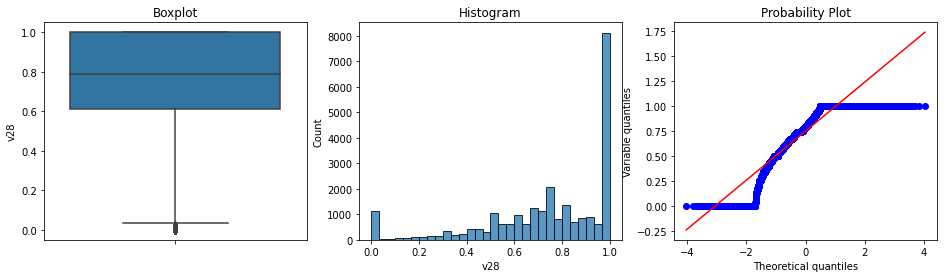

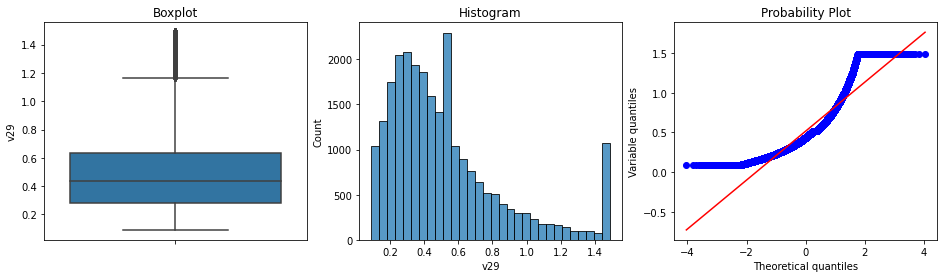

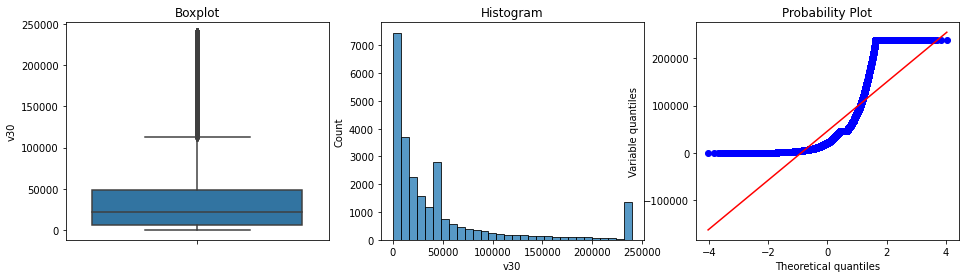

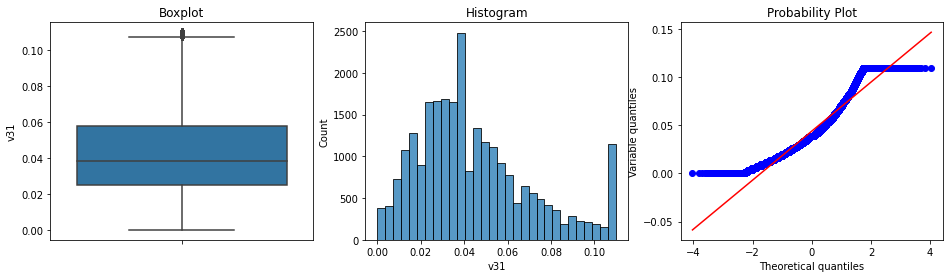

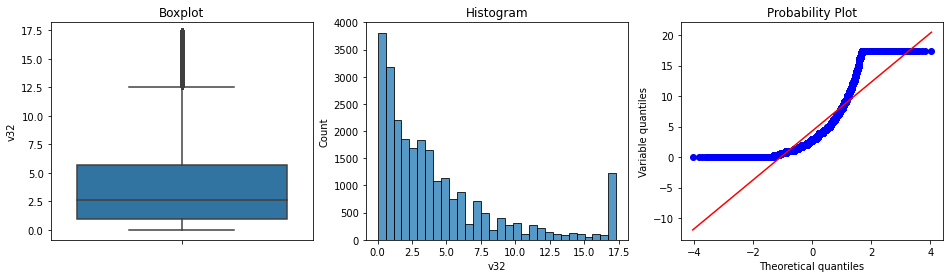

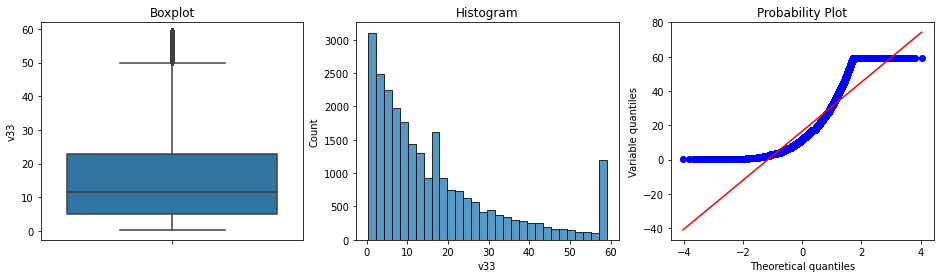

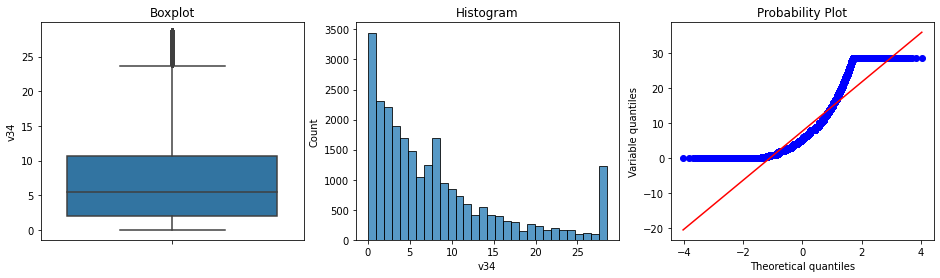

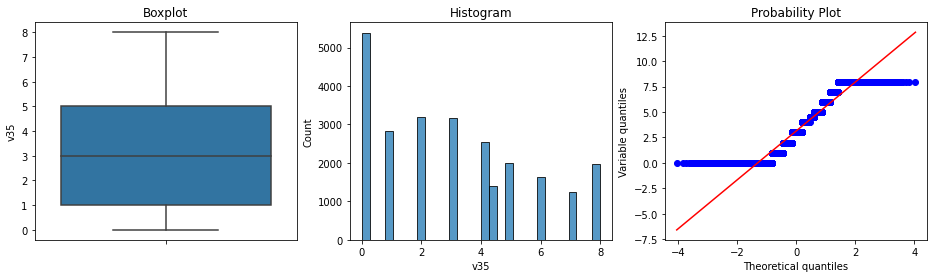

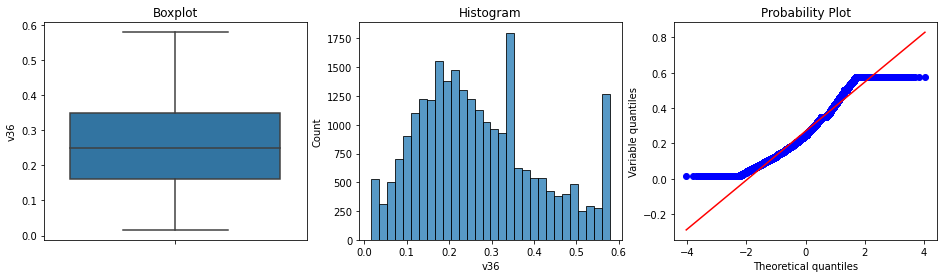

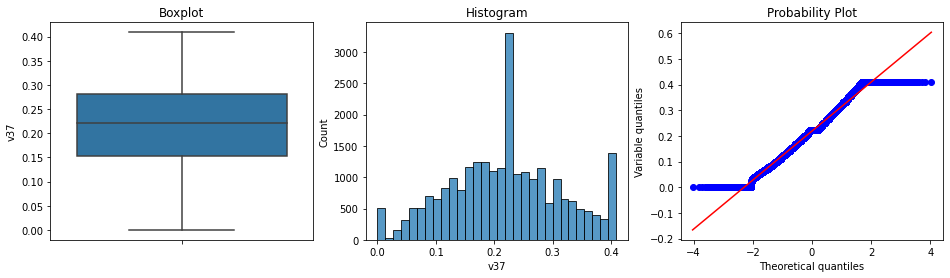

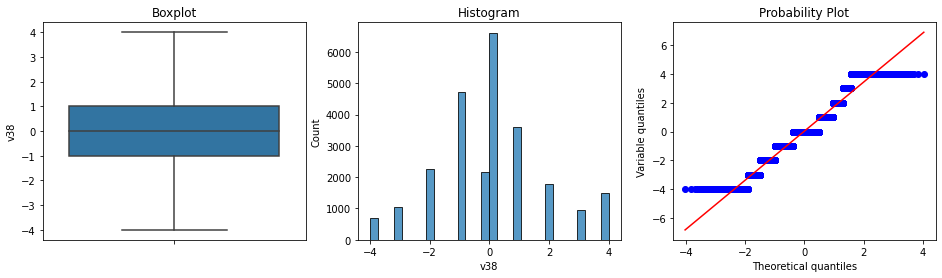

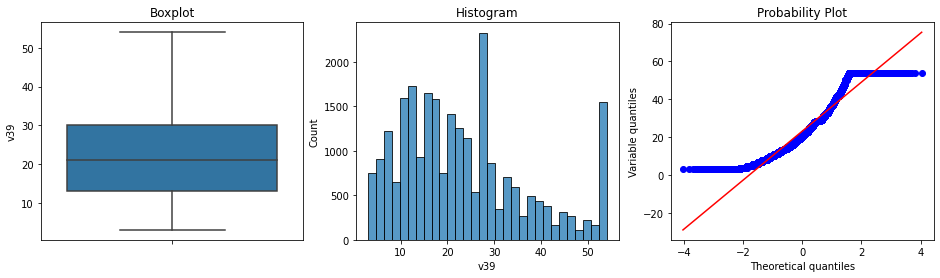

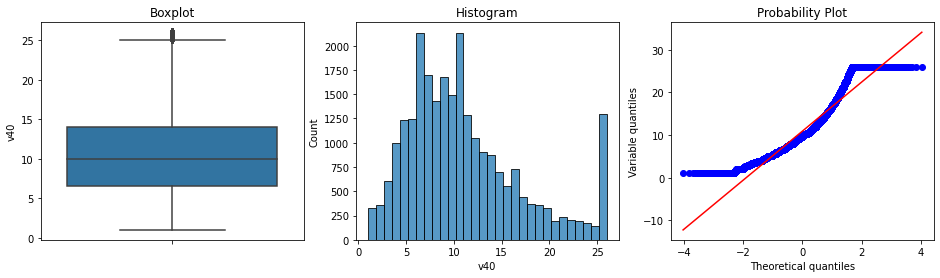

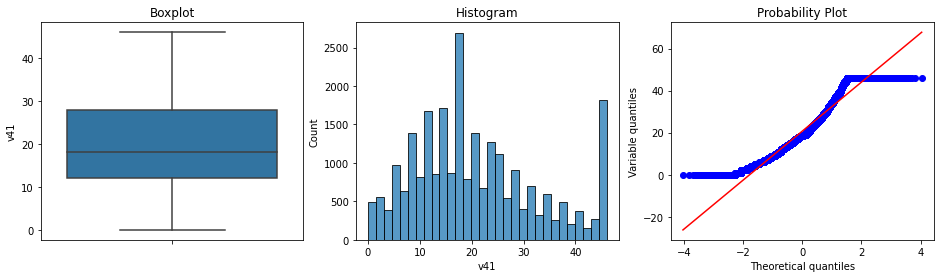

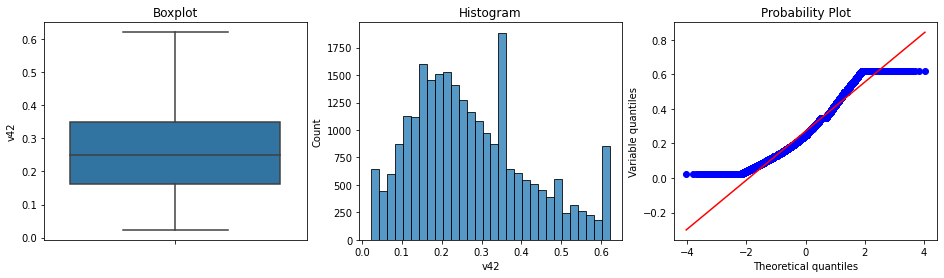

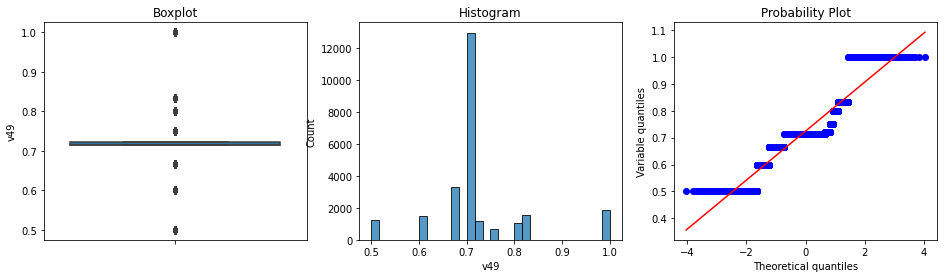

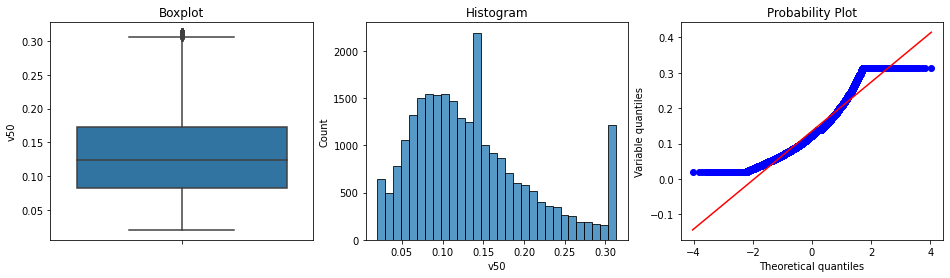

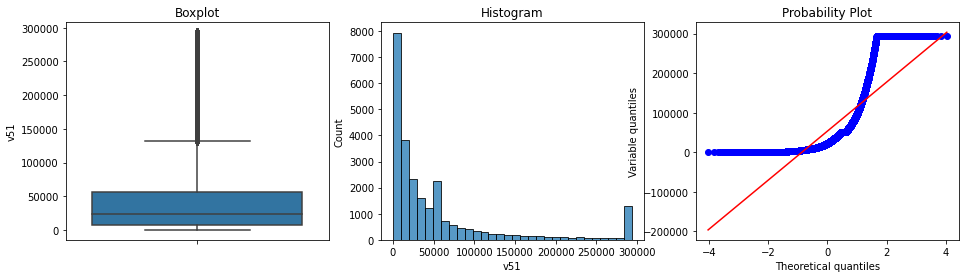

In [36]:
# visualizing for next 20 columns
for cols in X_num.columns[20:40]:
    show_plots(X_num, cols)

#### Columnwise Observations

- Columns v26,v27,v28,v29,v30,v31,v32,v33,v34,v40,v49,v50,v51 have outliers

In [37]:
columns_with_outlier_2 = ['v26','v27','v28','v29','v30','v31','v32','v33','v34','v40','v49','v50','v51']

In [38]:
# describing the numerical features percentile for last 16 numerical columns

X_num[num_features[40:]].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.9,0.99])

,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67
count,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000
mean,41682.066156,41685.524821,42375.259584,3086.029265,78675.855203,1.570672,1.404802,0.317551,0.534543,0.261736,0.123266,0.506503,0.773140,0.459692,0.459692,2.798317
std,57399.898498,57393.389688,57687.731831,41378.720771,101018.886777,1.287156,1.123252,0.127574,0.149937,0.306049,0.202833,0.230312,0.234860,0.248089,0.248089,2.381061
min,37.740215,-58.757503,0.000000,-195208.362900,585.410603,0.062791,0.011565,0.000000,0.122807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,37.740215,-58.757503,0.000000,-195208.362900,585.410603,0.062791,0.011565,0.000000,0.122807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,967.797147,891.294365,1204.057090,-45560.469392,3284.966306,0.192999,0.151106,0.110156,0.250000,0.000000,0.000000,0.142857,0.333333,0.072142,0.072142,0.000000
10%,2047.296227,2043.136968,2456.024512,-20878.946985,6199.301964,0.348137,0.291613,0.161290,0.333333,0.000000,0.000000,0.250000,0.466667,0.171959,0.171959,0.000000
25%,6030.284632,6012.173778,6642.111794,-5183.056787,14886.514725,0.682658,0.624242,0.239130,0.454545,0.000000,0.000000,0.372881,0.636364,0.298077,0.298077,1.000000
50%,19916.991360,19916.360620,20581.220620,-287.490072,42406.800080,1.275106,1.174613,0.319495,0.531250,0.166667,0.021622,0.500000,0.804348,0.433962,0.433962,2.000000
75%,41028.328665,41005.214303,41675.623452,7293.000873,79904.287502,1.856361,1.686848,0.400000,0.642857,0.400000,0.142857,0.614035,1.000000,0.577982,0.577982,4.000000


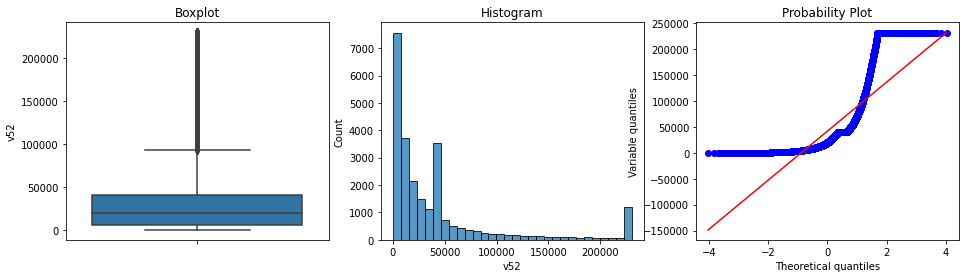

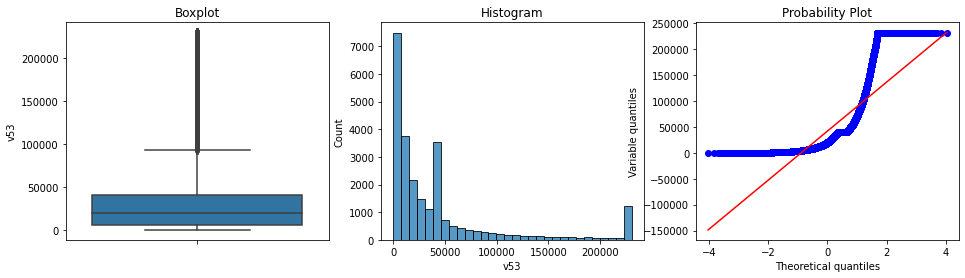

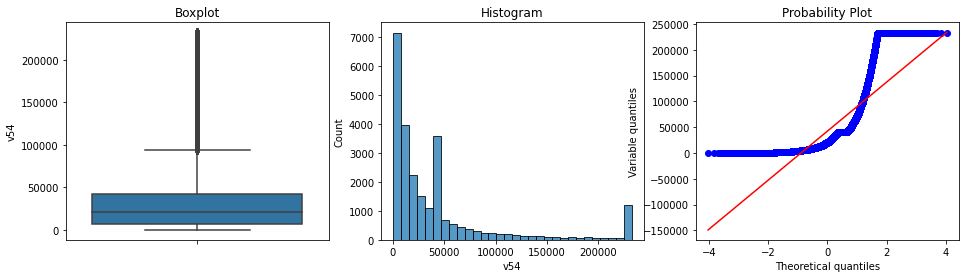

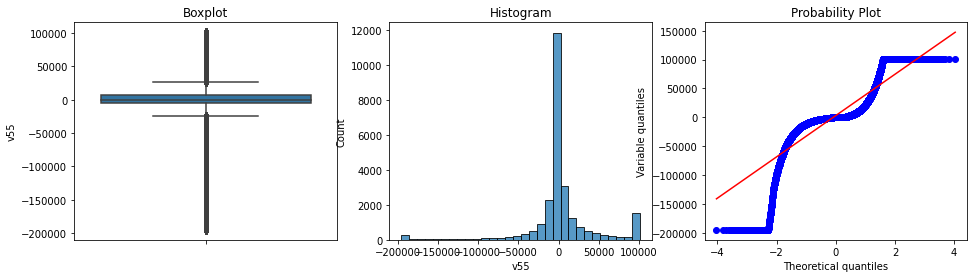

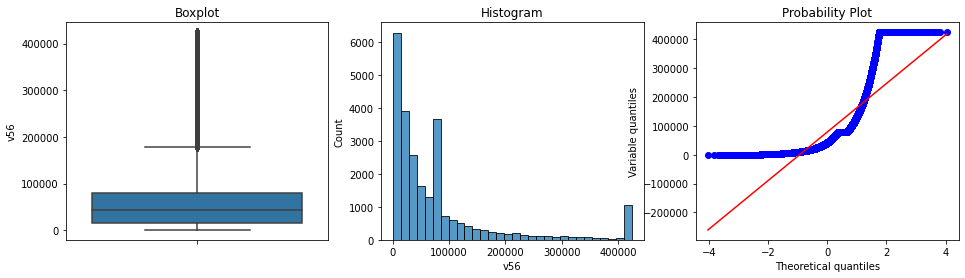

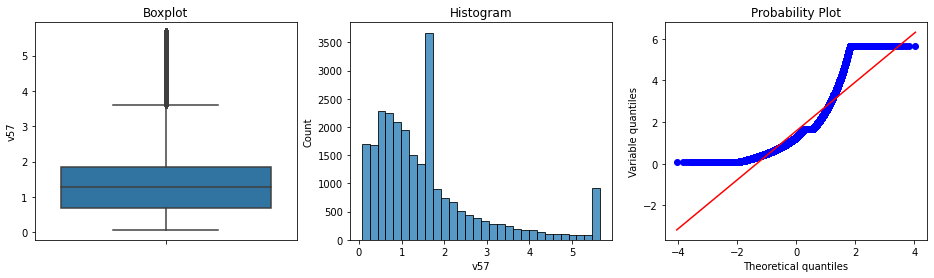

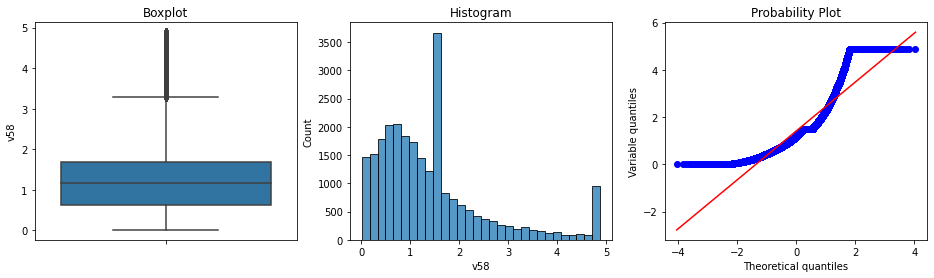

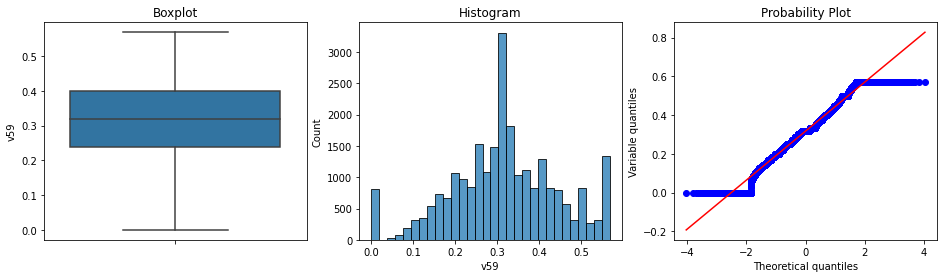

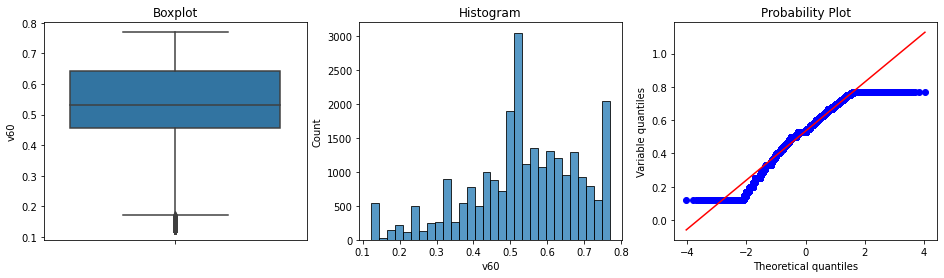

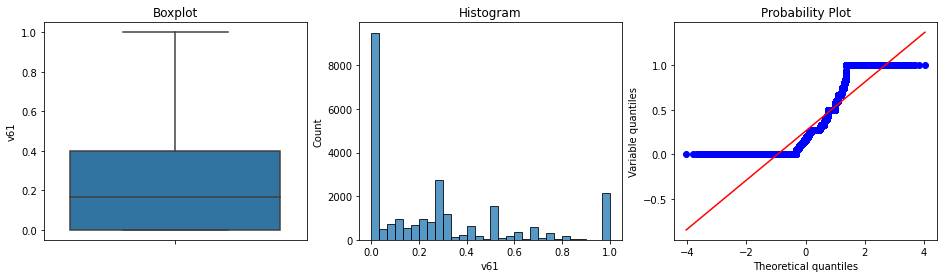

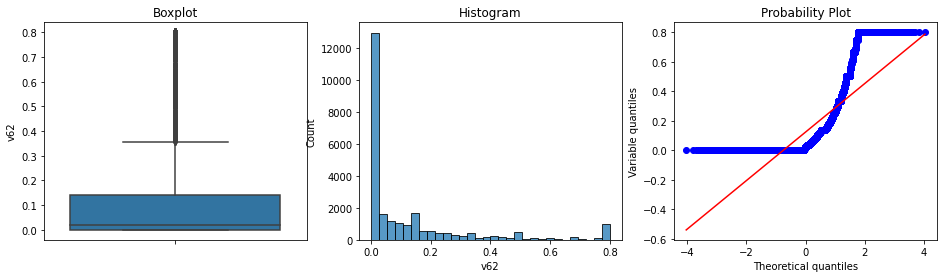

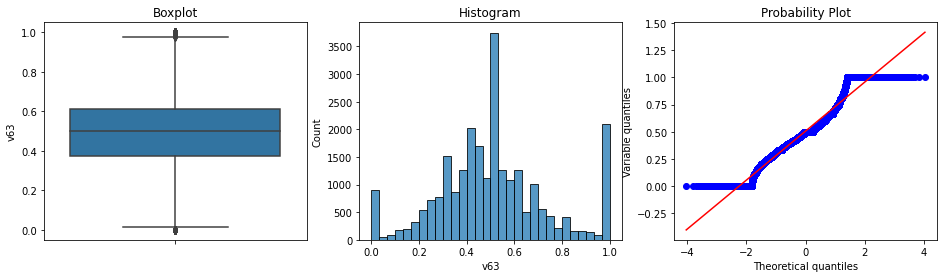

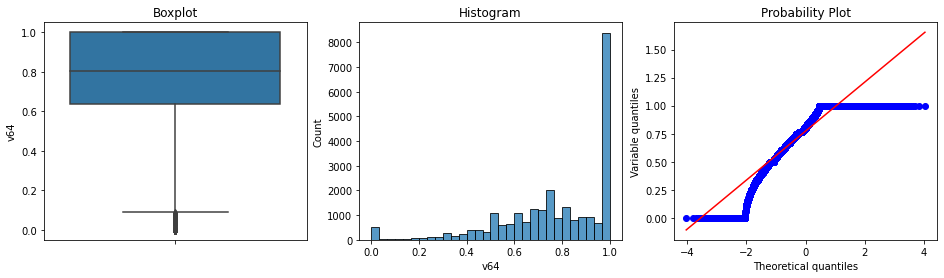

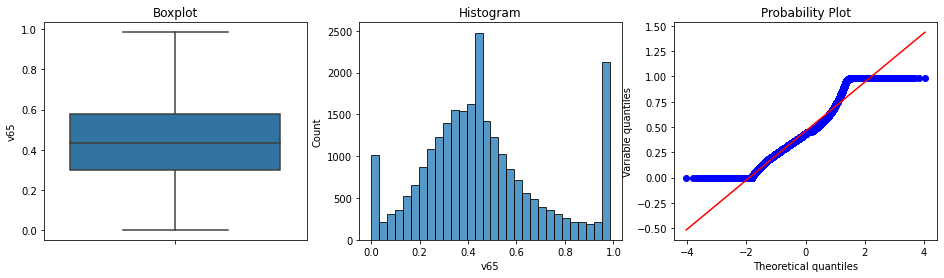

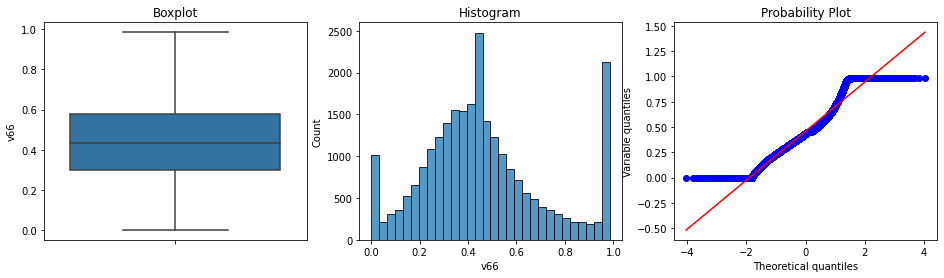

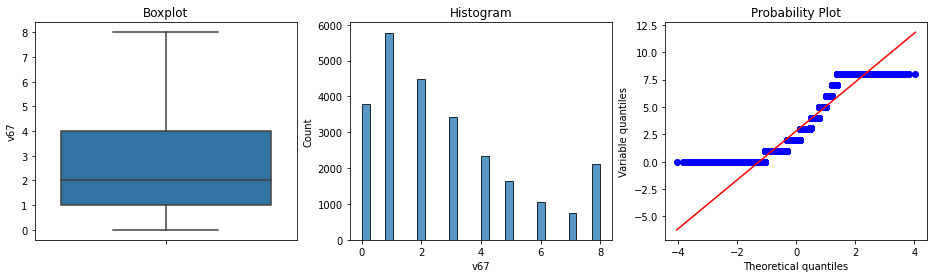

In [39]:
# visualizing for last 16 columns
for cols in X_num.columns[40:]:
    show_plots(X_num, cols)

In [40]:
columns_with_outlier_3 = ['v52','v53','v54','v55','v56','v57','v58','v60','v62','v63','v64']

In [41]:
# combining all the columns  containing outliers
all_columns_with_outlier = columns_with_outlier_1 + columns_with_outlier_2 + columns_with_outlier_3
len(all_columns_with_outlier)

41

### Outlier treatment

 From above distributions, we have got all the variables containing outliers in data.
 now, we will write a function to calculate IQR for each variable and will cap the extremes with permitted values
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)

In [42]:
# function to find boundaries for lower limit and upper limit
def find_boundaries(df, col, distance=1.5):

    '''Function will take dataframe and column name and will return upperlimit and lower limit'''
    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)

    lower_boundary = df[col].quantile(0.25) - (IQR * distance)
    upper_boundary = df[col].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [43]:
# for each outlier column in X_num
for cols in X_num[all_columns_with_outlier]:
    
    # get the upper range and lower range
    upper_range, lower_range = find_boundaries(X_num, cols)
    
    # Now let's replace the outliers by the maximum and minimum limit

    X_num[cols]= np.where(X_num[cols] > upper_range, upper_range,
                       np.where(X_num[cols] < lower_range, lower_range, X_num[cols]))
#     print (f"{cols}:upper_range:{upper_range}, lower_range:{lower_range}")

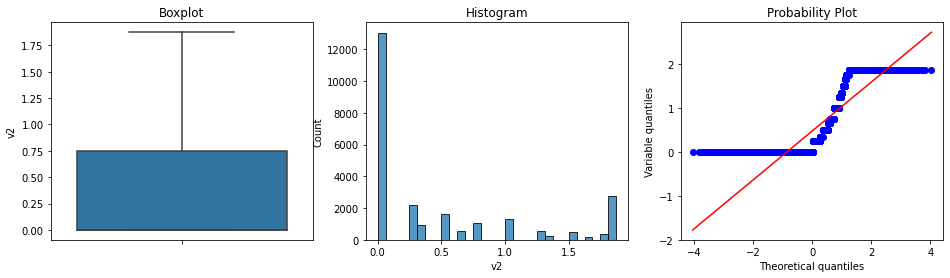

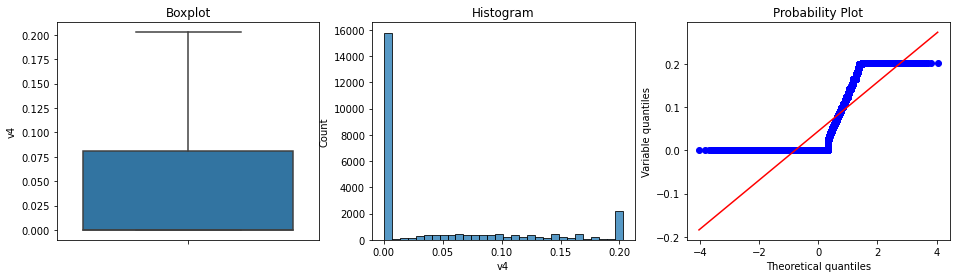

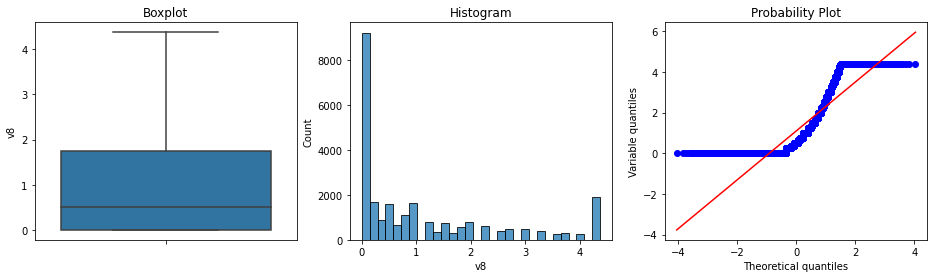

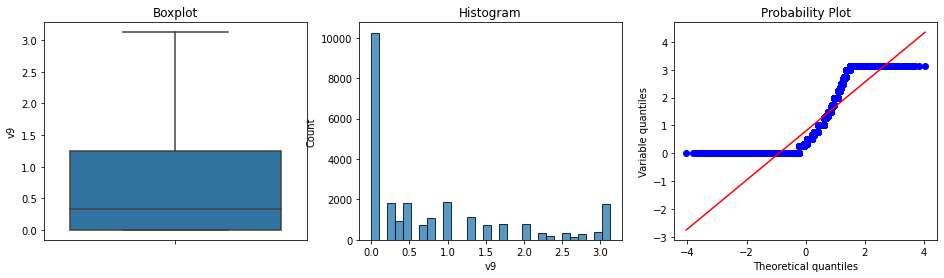

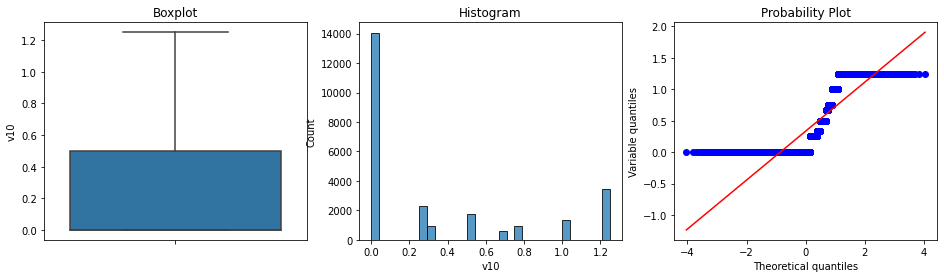

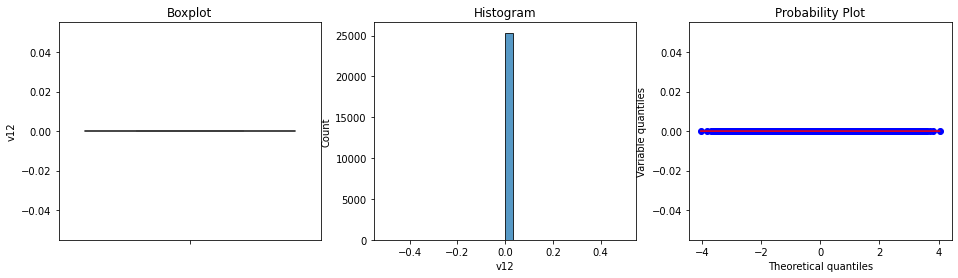

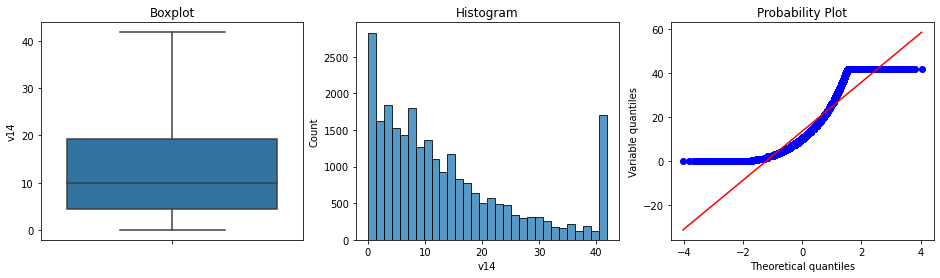

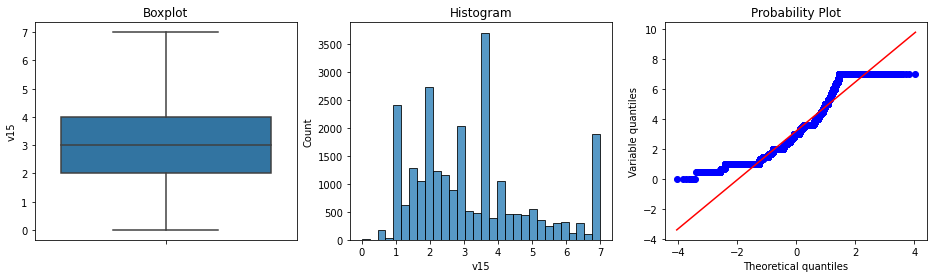

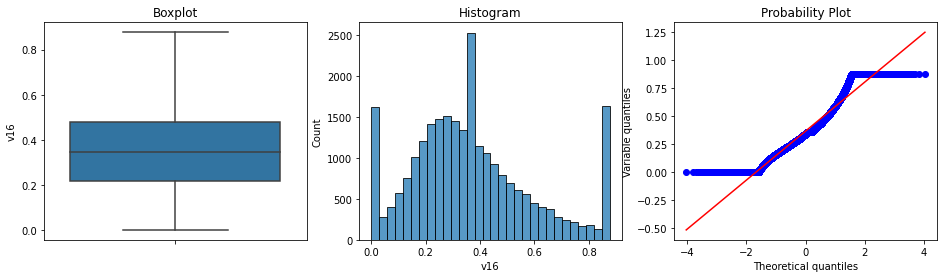

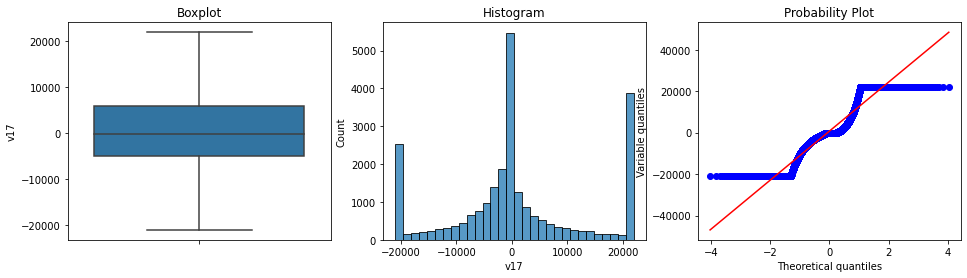

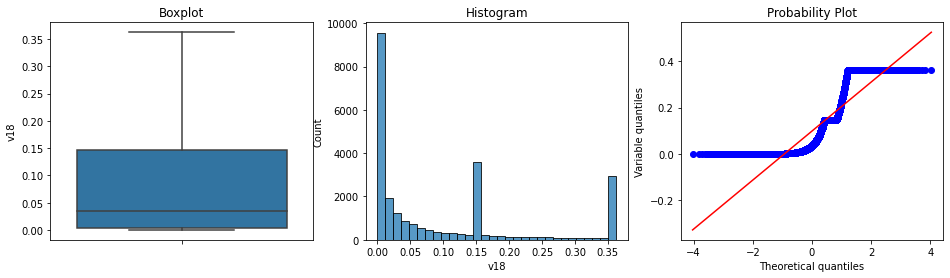

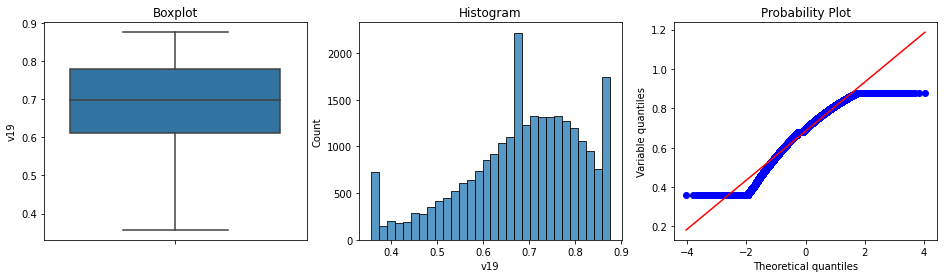

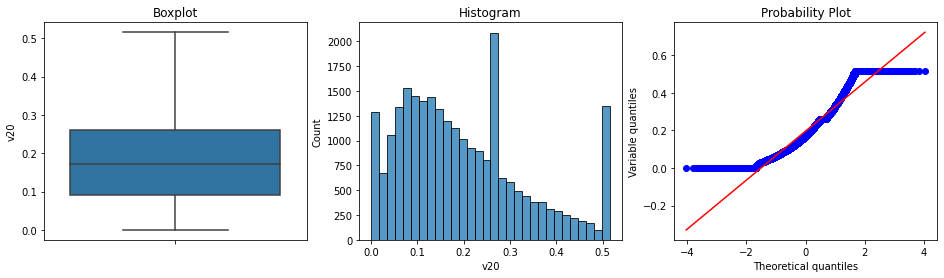

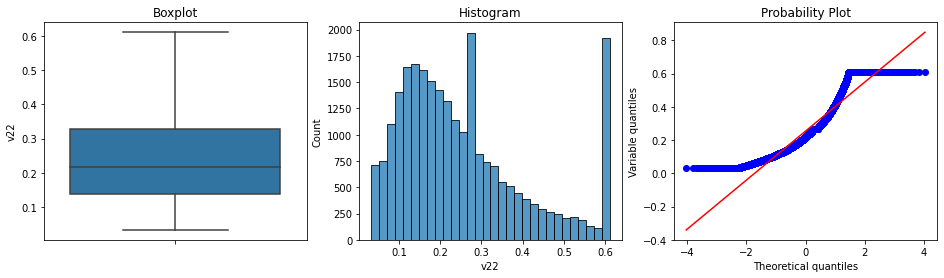

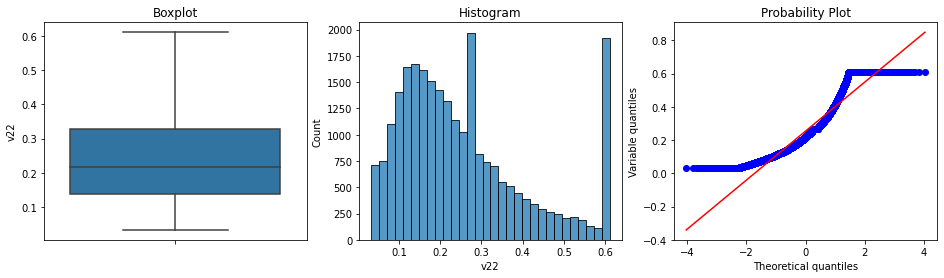

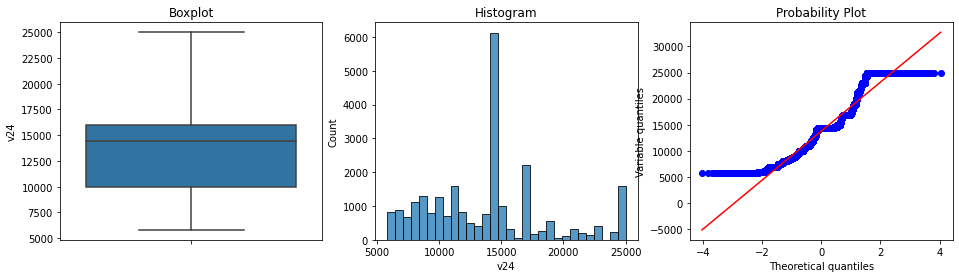

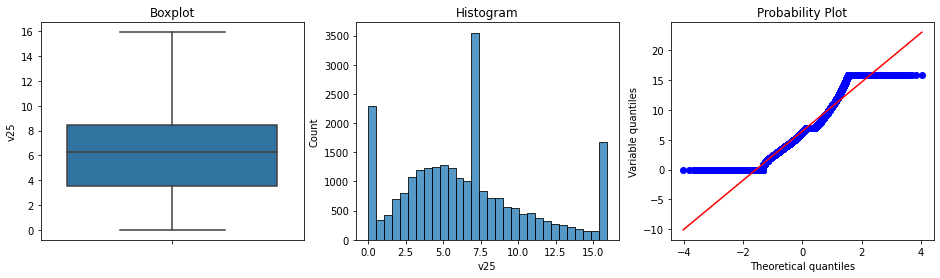

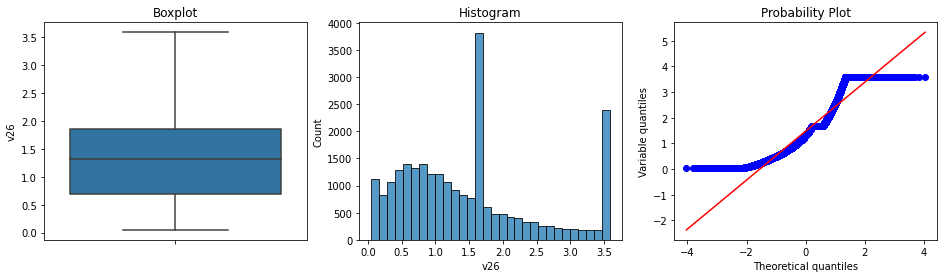

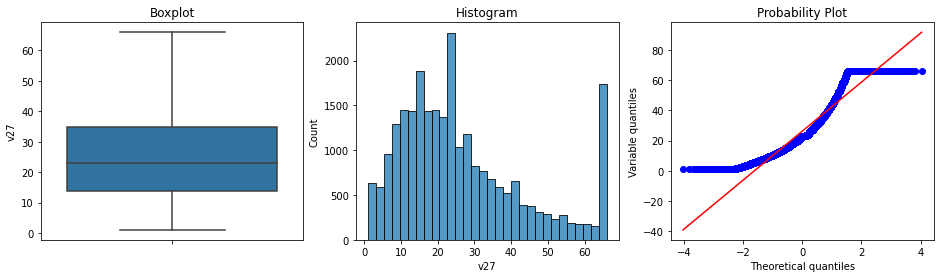

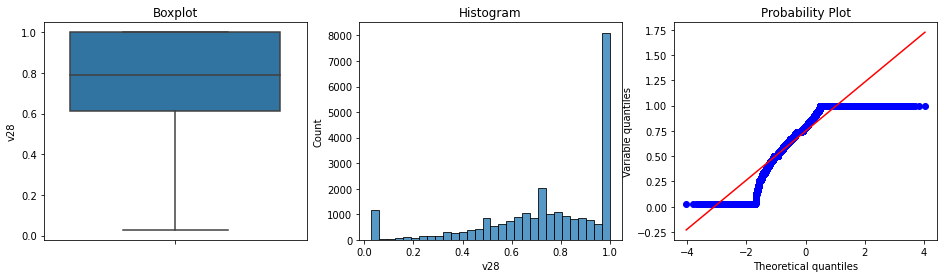

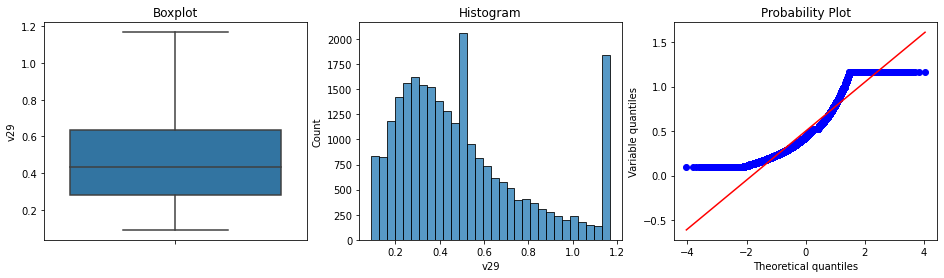

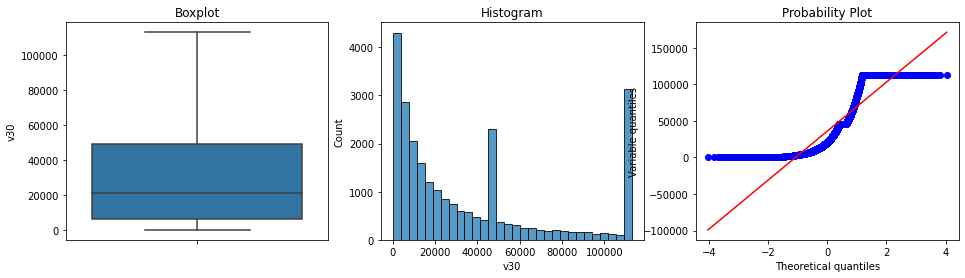

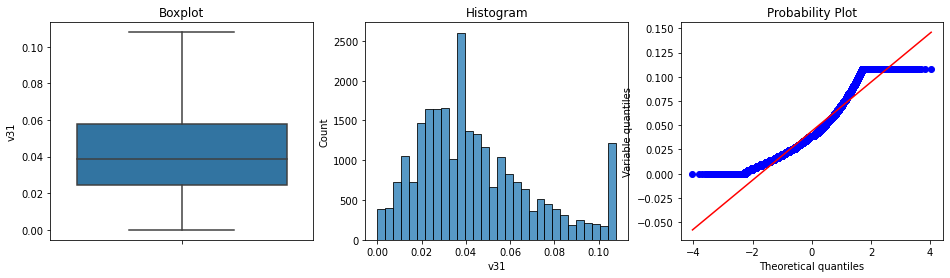

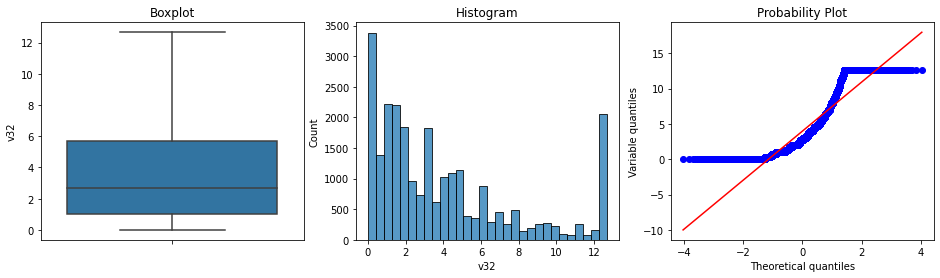

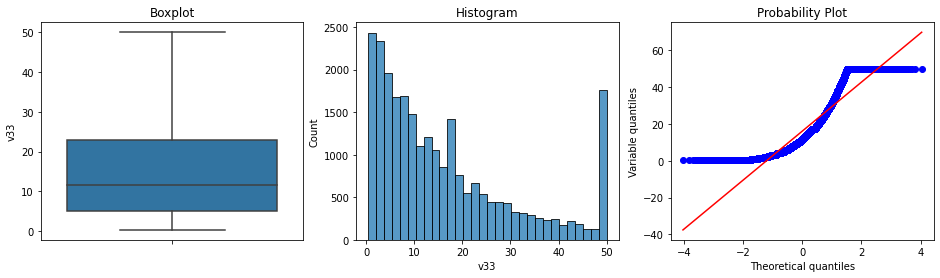

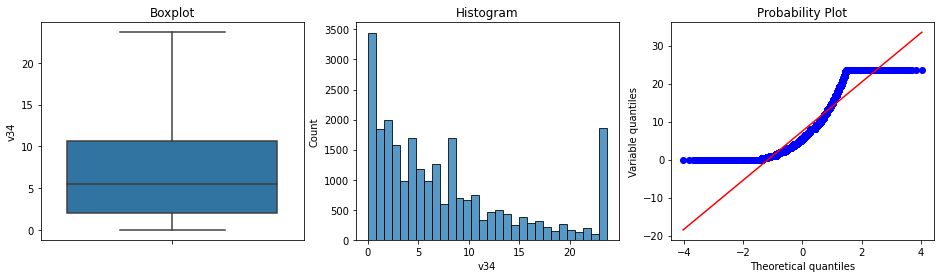

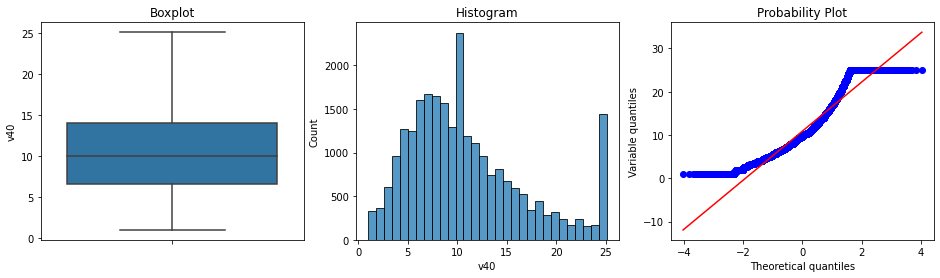

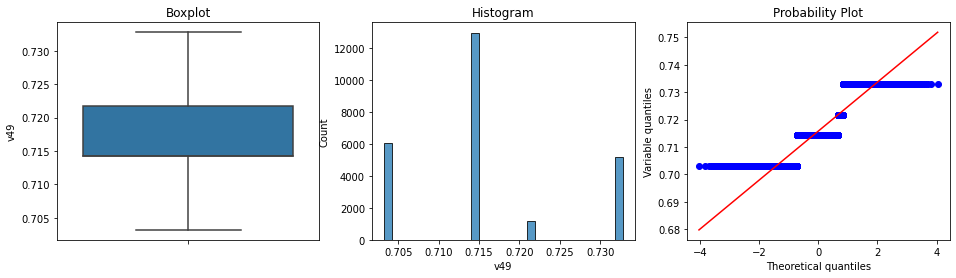

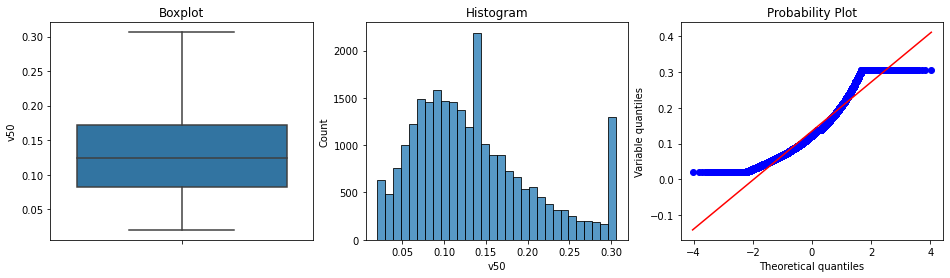

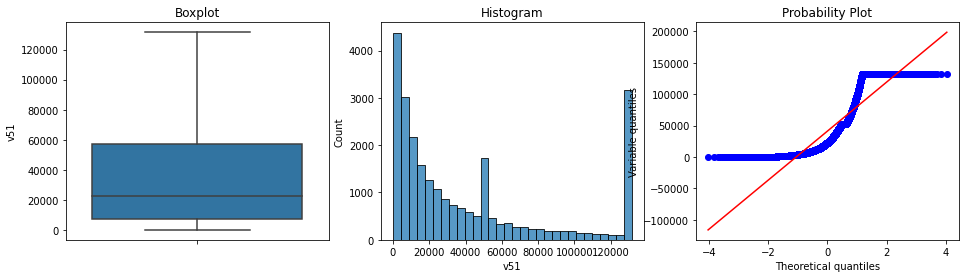

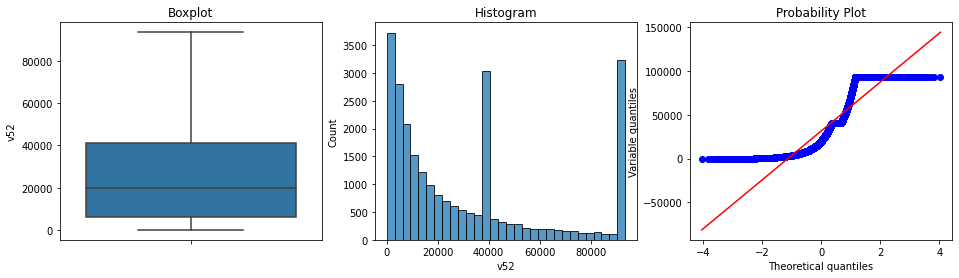

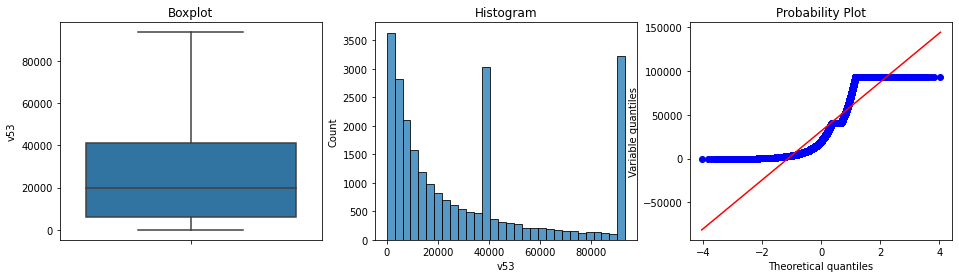

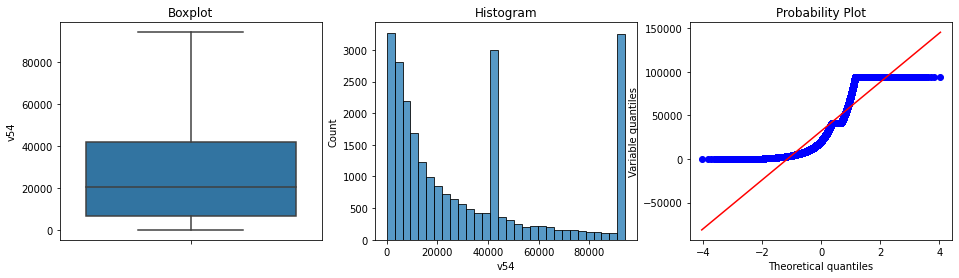

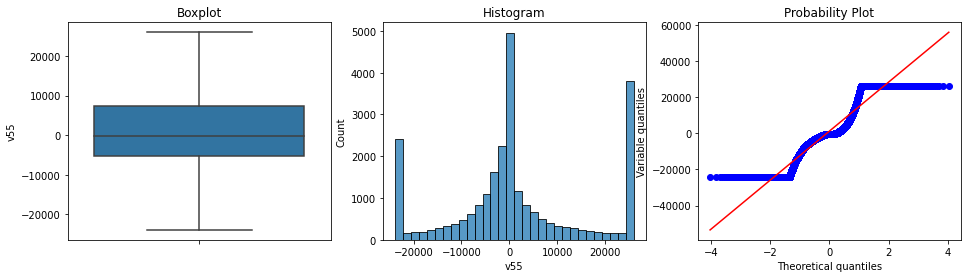

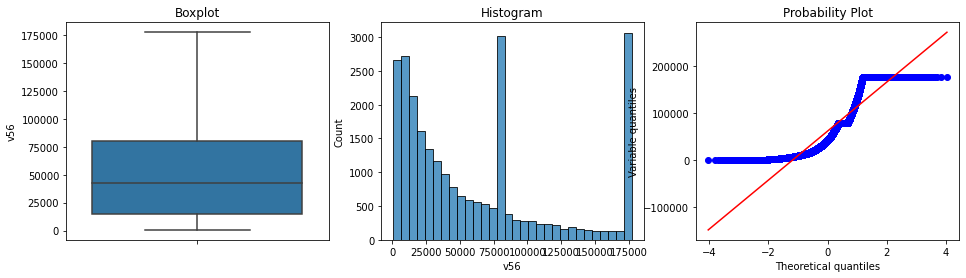

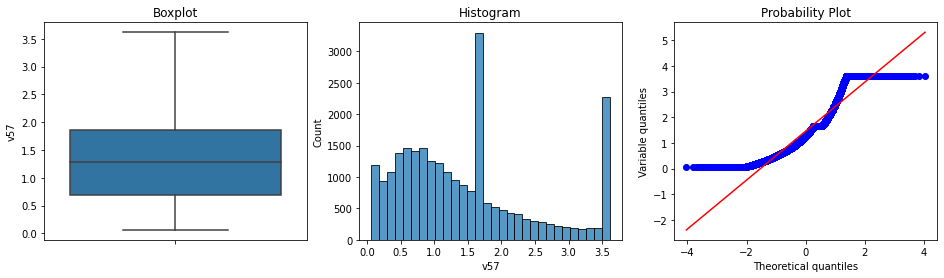

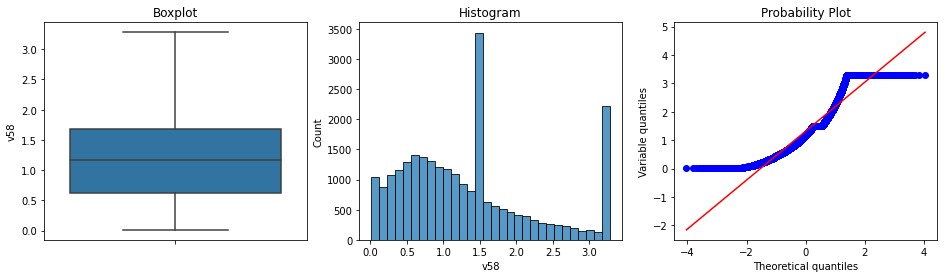

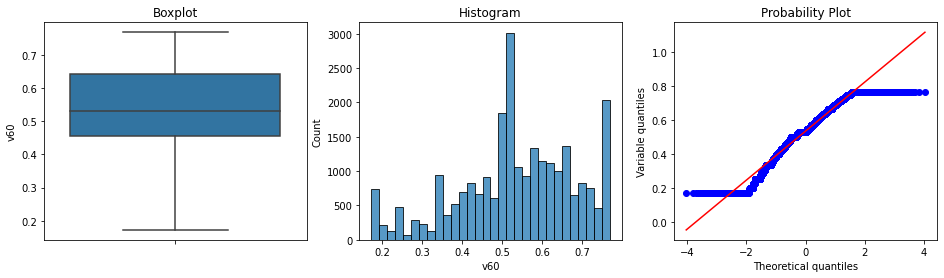

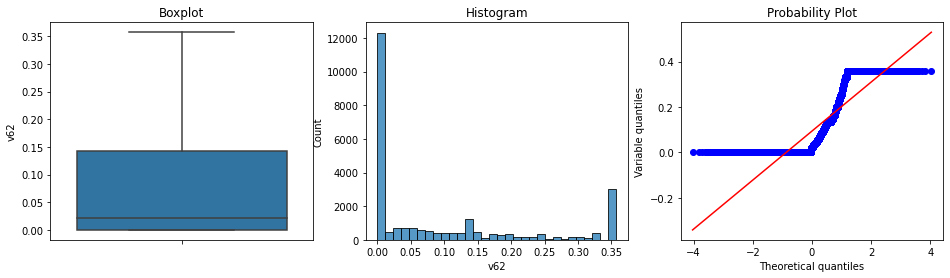

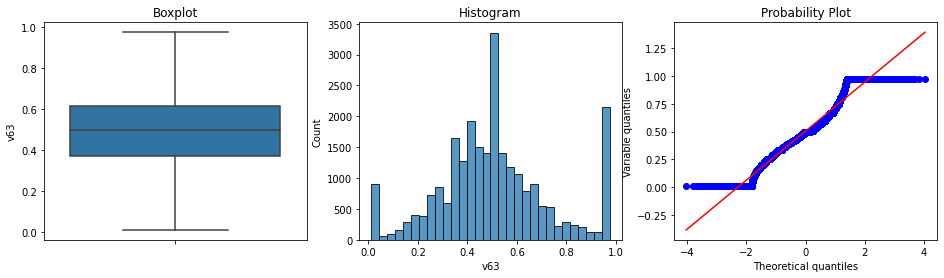

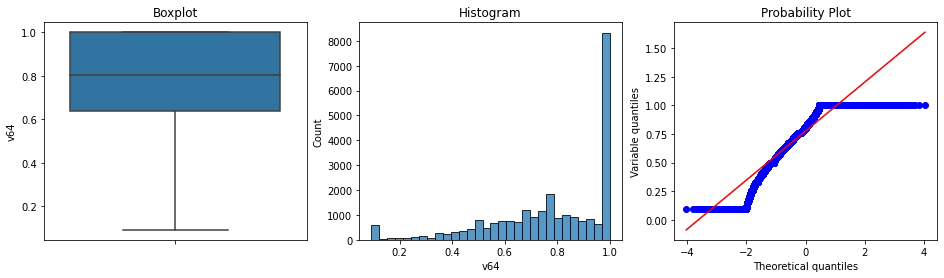

In [44]:
# checking if outliers are removed or not
for cols in X_num[all_columns_with_outlier]:
     show_plots(X_num, cols)

### Observations
- After applying Outlier censoring and capping, we can now see that there are no outliers present

# Feature Selection - Numerical Features

## Removing features with zero variance

In [45]:
# checking shape of X_num before removing features with zero variance
X_num.shape

(25356, 56)

In [46]:
# removing features with Zero variance
from sklearn.feature_selection import VarianceThreshold
feature_selector = VarianceThreshold(threshold=0)
feature_selector.fit_transform(X_num)

# Calling variances_ to get the variance score generated for each feature
variance_list = feature_selector.variances_
# variance_list
# print(variance_list)
print(X_num.columns)

# get_support method will give indexes of columns being selected
cols = feature_selector.get_support(indices=True)
# cols
X_num_feature_after_VT = X_num.iloc[:,cols]
print(X_num_feature_after_VT.columns)

Index(['v2', 'v3', 'v4', 'v8', 'v9', 'v10', 'v11', 'v12', 'v14', 'v15', 'v16',
       'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26',
       'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36',
       'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v49', 'v50', 'v51', 'v52',
       'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62',
       'v63', 'v64', 'v65', 'v66', 'v67'],
      dtype='object')
Index(['v2', 'v3', 'v4', 'v8', 'v9', 'v10', 'v11', 'v14', 'v15', 'v16', 'v17',
       'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27',
       'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37',
       'v38', 'v39', 'v40', 'v41', 'v42', 'v49', 'v50', 'v51', 'v52', 'v53',
       'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63',
       'v64', 'v65', 'v66', 'v67'],
      dtype='object')


In [47]:
# Checking the shape of data after  removing feature with zero variance
X_num_feature_after_VT.shape

(25356, 55)

#### Observations
- From above we can observe that one feature got removed from X_num 
- v12 is the removed feaature

## Selecting K-Best Features

In [48]:
# We will further reduce our feature space by selecting  30 features (p.s - we can take any number of feature)
# for this purpose selectKBest can be used 

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=30)
selector.fit_transform(X_num_feature_after_VT, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_select_features_num = X_num_feature_after_VT.iloc[:,cols]

# showing feature importance score  generated by SelectkBest in descending order
feature_importances_=pd.DataFrame(selector.scores_,
                                 index=X_num_feature_after_VT.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_)


   
    

     importance
v8   775.643760
v9   770.762978
v2   747.611993
v10  704.125513
v58  553.924088
v57  536.390017
v26  488.395068
v27  470.164965
v40  413.950593
v20  361.653428
v55  333.313680
v64  322.199443
v19  320.827620
v17  316.283734
v29  308.372725
v28  278.341182
v62  269.755489
v4   253.701185
v50  252.226657
v31  245.232055
v41  214.680175
v15  212.935183
v22  209.816511
v52  205.316954
v53  198.383372
v32  193.471304
v11  184.767119
v3   184.625097
v54  182.522213
v51  178.160582
v21  178.118371
v30  163.911239
v33  161.804822
v67  136.497909
v14  121.045542
v18  113.694907
v35  108.500902
v38  101.654775
v37   99.412684
v56   99.310399
v34   94.731547
v25   89.080202
v61   79.770239
v36   78.072081
v42   77.954291
v23   74.650626
v65   61.317013
v66   61.317013
v39   53.766005
v63   47.428423
v59   38.374828
v60   20.714686
v24   19.879946
v49    4.992315
v16    0.134189


In [49]:
## Function to plot the feature importance
def plot_feature_importance(df):
    ''' Function will take input as feature importance dataframe and will plot the feature importance in descending order'''
    
    # define figure size
    plt.figure(figsize=(20, 8))
    
    # plot the scores
    sns.barplot(x=df.index,y='importance',data=df,order=df.sort_values('importance',ascending=False).index)

    # set labels
    plt.xlabel("Feature", size=15)
    plt.ylabel("Score", size=15)
    plt.title("Feature v/s Score (Feature Importance)")


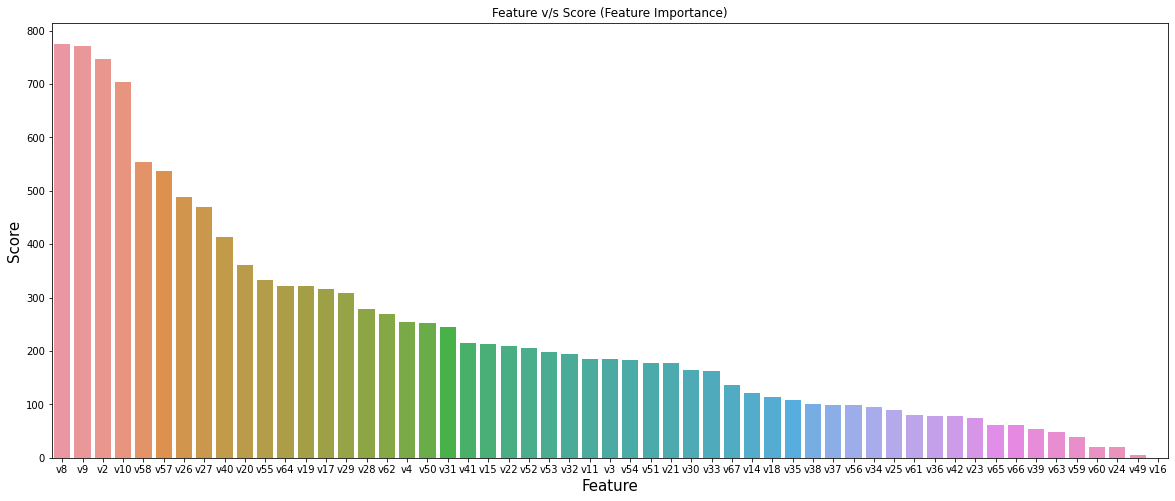

In [50]:
# Plotting feature importance obtained from SelectKBest
plot_feature_importance(feature_importances_)

In [51]:
print(X_select_features_num.columns)

Index(['v2', 'v3', 'v4', 'v8', 'v9', 'v10', 'v11', 'v15', 'v17', 'v19', 'v20',
       'v22', 'v26', 'v27', 'v28', 'v29', 'v31', 'v32', 'v40', 'v41', 'v50',
       'v51', 'v52', 'v53', 'v54', 'v55', 'v57', 'v58', 'v62', 'v64'],
      dtype='object')


In [52]:
X_select_features_num.shape

(25356, 30)

# Feature selection - Categorical Features

In [53]:
X_cat.shape

(25356, 5)

- Since there are only few categorical features , we will consider all the categorical features for our model


# Creating the Master Feature Set for Model Development

In [54]:
# Creating a master feature set combining all the selected numerical features and categorical features
X_all=pd.concat([X_select_features_num,X_cat],axis=1,join="inner")
X_all.shape

(25356, 35)

In [55]:
# Checking the value counts in our target variable
y['y'].value_counts()

0    23858
1     1498
Name: y, dtype: int64

# Splitting the dataset in training and testing 

In [56]:
# Splitting the dataset into 80:20 ratio 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, y, test_size=0.2, random_state=10)

In [57]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (20284, 35)
Shape of Testing Data (5072, 35)
Response Rate in Training Data y    0.059012
dtype: float64
Response Rate in Testing Data y    0.059345
dtype: float64


### Handling Imbalance data by doing random oversampling

In [58]:
# Since we have very less no. of minority sample, we will handle this imbalance by doing oversampling of minority class
# The class can be defined and takes a sampling_strategy argument that can be set to “minority” to automatically balance the minority class with majority class 

from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [59]:
y_over.value_counts()

y
1    19087
0    19087
dtype: int64

### Basis for selecting  classification model
- Non Linearity in feature relationships are observed which makes tree methods a good choice
- There are few options to consider among tree methods
     - White Box (Completely Explainable Set of Rules) - Decision Tree
     - Ensemble Methods - Random Forest (With Bagging)
     - Ensemble Methods - GBM/XGBoost (Boosting)

### Building Decision Tree as base estimator

In [60]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

### Finding best hyper-parameters (Hyperparameter - Tuning)

In [61]:
# We are skipping randomized search CV here because no. of features in our feature space is considerably small
# GridSearchCV is applied to find the best parameter
# please note we will apply GridSearchCv on our original training data X_train and y_train

from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, scoring='f1', param_grid=param_dist,n_jobs = -1)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 50}


### Training decision tree with obtained hyper-parameters

In [62]:
# We will build all the models to over sampled training data
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=50)
dtree.fit(X_over,y_over)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=0)

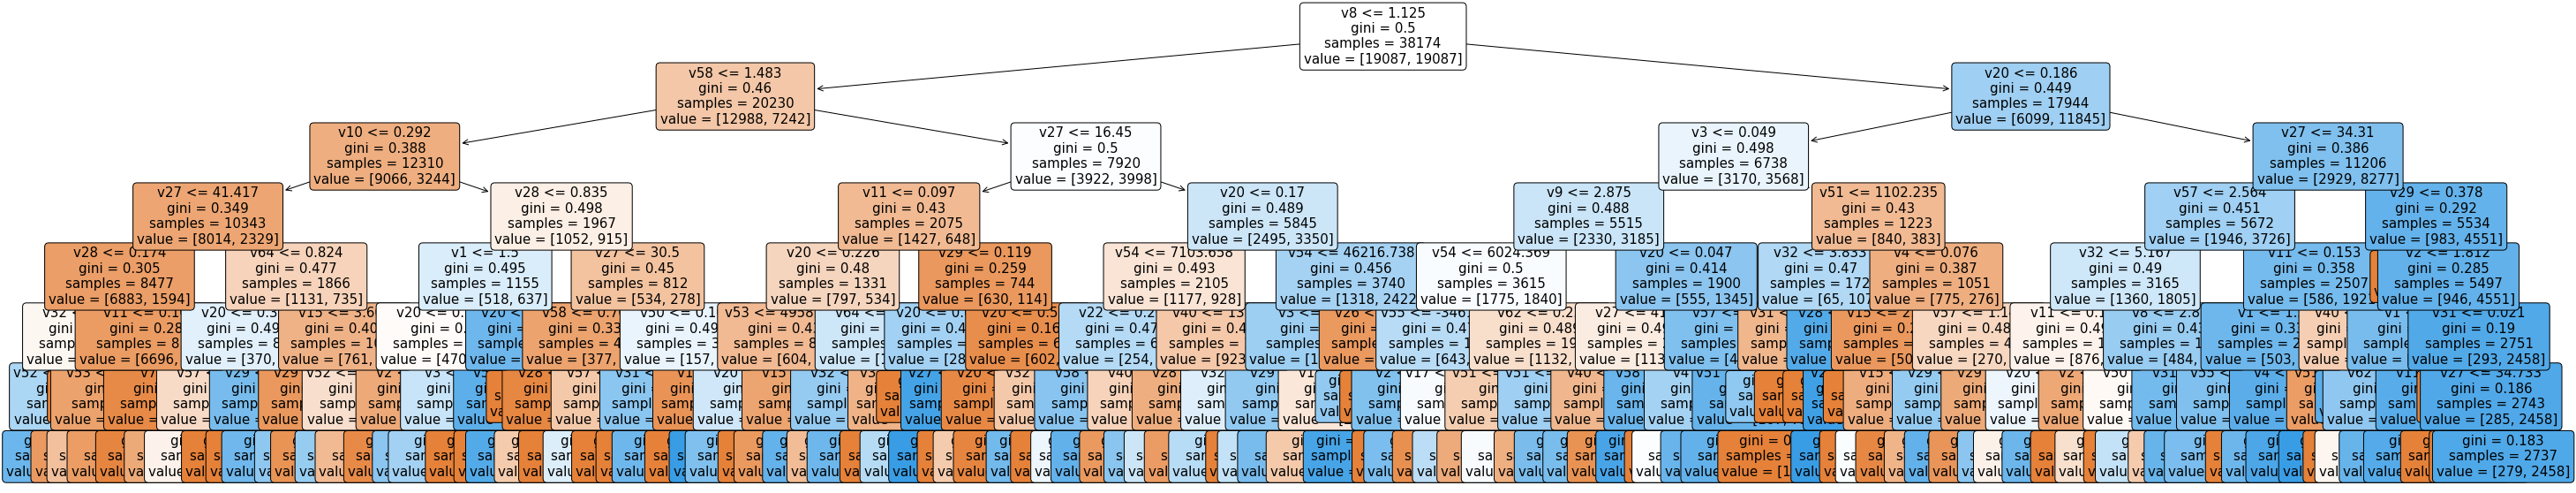

In [63]:
from sklearn import tree
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_over.columns)
plt.show()

### Building a Random Forest Model

In [64]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=50)
rf.fit(X_over,y_over)

RandomForestClassifier(max_depth=7, min_samples_split=50, random_state=0)

#### Showing feature importance generated by random forest model

In [65]:
feature_importances_rf=pd.DataFrame(rf.feature_importances_,
                                 index=X_over.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rf

,importance
v8,0.068975
v9,0.061437
v10,0.054427
v20,0.053267
v58,0.053111
v2,0.049644
v55,0.047968
v1,0.046210
v27,0.045126
v57,0.040647


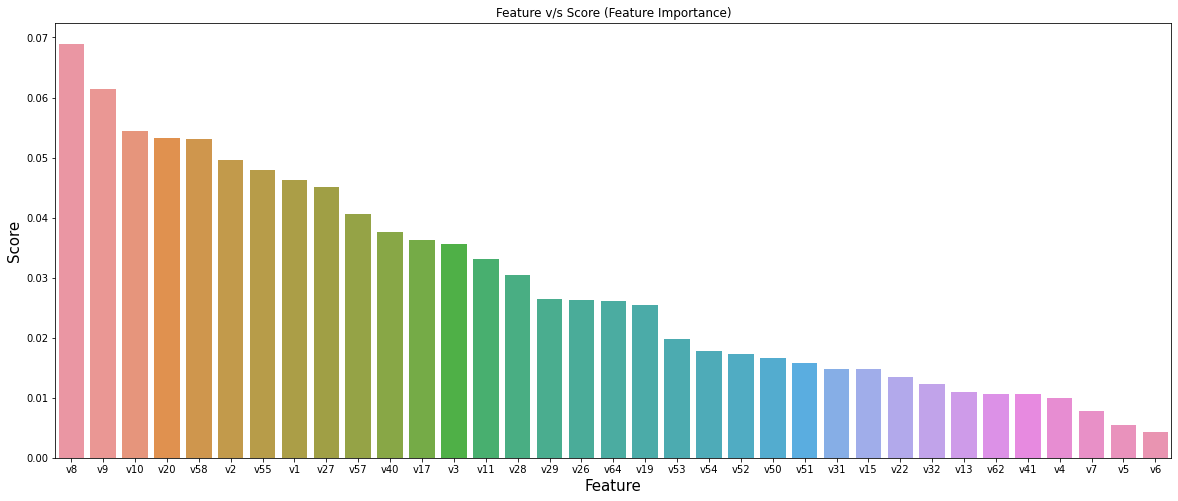

In [66]:
plot_feature_importance(feature_importances_rf)

### Building a Gradient Boosting Model

In [67]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=7,min_samples_split=50)
gbm.fit(X_over,y_over)

GradientBoostingClassifier(criterion='mse', max_depth=7, min_samples_split=50,
                           random_state=0)

In [68]:
# showing feature importance score
feature_importances_gb=pd.DataFrame(gbm.feature_importances_,
                                 index=X_over.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances_gb

,importance
v8,0.100696
v20,0.081655
v27,0.052005
v58,0.051062
v40,0.034537
v11,0.034242
v51,0.034018
v57,0.033486
v50,0.033401
v15,0.032602


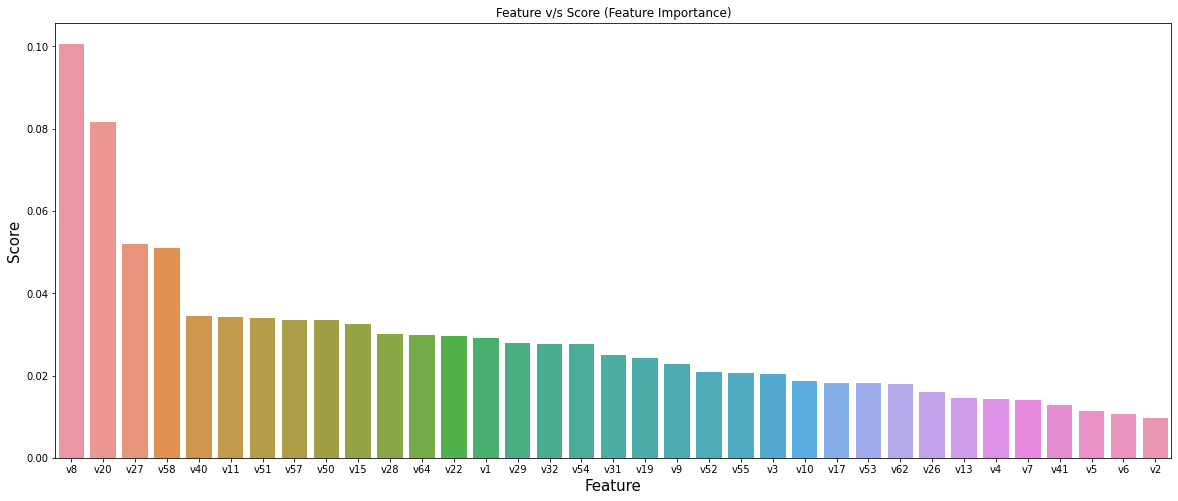

In [69]:
# plotting the feature importance score in descending order
plot_feature_importance(feature_importances_gb)

# Model Evaluation

In [70]:
# Calculating predict and predict_proba for all the above models

y_pred_tree=dtree.predict(X_test)
y_pred_tree_proba = dtree.predict_proba(X_test)[:,1]
y_pred_rf=rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:,1]
y_pred_gbm=gbm.predict(X_test)
y_pred_gbm_proba = gbm.predict_proba(X_test)[:,1]



In [71]:
# function to show Accuracy, Precision, Recall and F1-Score
def show_validation_scores(model_name,y_test,y_pred):
    '''Function will take model_name, y_test and y_pred(corresponding to each model ) as input '''
    print (f"Scores for {model_name};")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test,y_pred))
    print("Recall:",metrics.recall_score(y_test,y_pred))
    print("f1_score:",metrics.f1_score(y_test,y_pred))


In [72]:
# Function to show and plot roc_curve
def plot_roc_curve(Y_test, model_probs):
    
    '''Input to the function is Y_test and Y_pred_proba'''
    random_probs = [0 for _ in range(len(Y_test))]
     # calculate AUC
    model_auc = roc_auc_score(Y_test, model_probs)
     # summarize score
    print('Model: ROC AUC=%.3f' % (model_auc))
     # calculate ROC Curve
      # For the Random Model
    random_fpr, random_tpr, _ = roc_curve(Y_test, random_probs)
      # For the actual model
    model_fpr, model_tpr, _ = roc_curve(Y_test, model_probs)
     # Plot the roc curve for the model and the random model line
    plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
    plt.plot(model_fpr, model_tpr, marker='.', label='Model')
     # Create labels for the axis
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
     # show the legend
    plt.legend()
     # show the plot
    plt.show()

### Evaluating Decision Tree Model

In [73]:
# Evaluating Decision Tree
show_validation_scores("Decision Tree",y_test,y_pred_tree)


Scores for Decision Tree;
Accuracy: 0.6920347003154574
Precision: 0.11104256631708821
Recall: 0.5980066445182725
f1_score: 0.18730489073881373


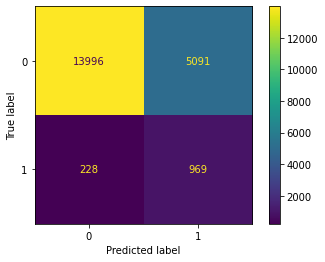

In [74]:
# plotting confusion matrix
metrics.plot_confusion_matrix(dtree,X_train,y_train)
# metrics.plot_confusion_matrix(dtree,X_test,y_test)

Model: ROC AUC=0.682


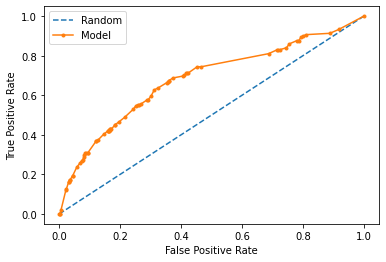

In [75]:
# plotting roc curve for decision tree
plot_roc_curve(y_test,y_pred_tree_proba)

### Evaluating Random Forest Model

In [76]:
# Evaluating Random Forest model 
show_validation_scores("Random Forest",y_test,y_pred_rf)

Scores for Random Forest;
Accuracy: 0.7608438485804416
Precision: 0.14923076923076922
Recall: 0.6445182724252492
f1_score: 0.24234853216739535


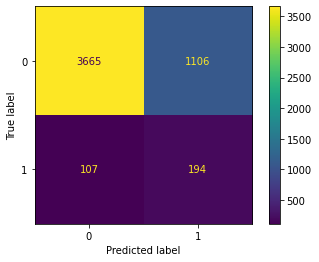

In [77]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

Model: ROC AUC=0.779


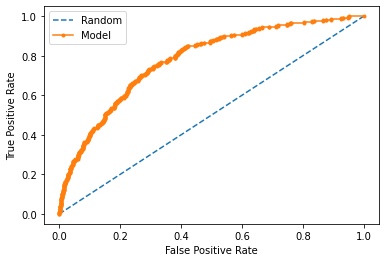

In [78]:
# plotting roc curve for random forest tree
plot_roc_curve(y_test,y_pred_rf_proba)

### Evaluating Gradient Boost Model

In [79]:
# Evaluating Gradient Boost model 
show_validation_scores("Gradient Boost",y_test,y_pred_gbm)

Scores for Gradient Boost;
Accuracy: 0.8862381703470031
Precision: 0.1834862385321101
Recall: 0.26578073089701
f1_score: 0.21709633649932158


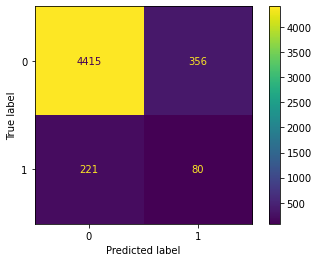

In [80]:
metrics.plot_confusion_matrix(gbm,X_test,y_test)

Model: ROC AUC=0.722


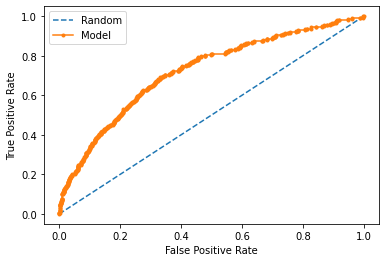

In [81]:
# plotting roc curve for gradient boosting model
plot_roc_curve(y_test,y_pred_gbm_proba)

# Conclusion

- The GBM Model has outperformed the decision tree and random forest model (wrt to all the evaluation parameters).
  we can use GBM model for our purpose
- We will build a Business Value Metric based on the features selected by GBM
- GBM can clssify classes accurately with 99.7% chance
